# 	 Method based on: Quantum computers as universal quantum simulators: state-of-art and perspectives -  arXiv:1907.03505



## The Heisenberg model

The Heisenberg model describes the spins of a magnetic system using quantum mechanics. It considers a lattice in which at each point a spin $s_i = \pm \frac{1}{2}$ represents a microscopic dipole magnet whose magnetic moment is either up (+$ \frac{1}{2}$) or down (-$ \frac{1}{2}$).

Here the spin operators (spin 1/2 particles) are related with the Pauli operators via the relation: $S_i = \frac{1}{2} \sigma_i$, for i = x,y,z.

The N-spin Heisenberg Hamiltonian can be written in terms of the Pauli matrices as:

$H_{Heis,N} = \sum_{i = 1 , \alpha = x,y,z}^{N}{h_{\alpha,i}^{(1)} \sigma_{\alpha}^{(i)}} + \sum_{i,j=1 , \alpha, \beta = x,y,z}^{N}{h_{\alpha \beta, i j }^{(2)} \sigma_{\alpha}^{(i)} \sigma_{\beta}^{(j)}}$

In this part of the project the objective is to study the Heisenberg model of a chain of 2 and 3 particles, by reconstructing the fidelity, correlation functions $C_{WL}$ and probability distribution of states for such systems in a noiseless superconducting architecture.

The next step is to implement a method for which a physical implementation of the $C_{Haar}$ would be possible in Q.TOK

## Part 1: Digital simulation of the time evolution of the 2-spin Heisenberg model

(1): The Hamiltonian for the 2-spin isotropic Heisenberg model can be written in terms of Pauli operators as:

$H_{Heis,2} = J ~(~ \sigma_x^{(1)} \sigma_x^{(2)} + \sigma_y^{(1)} \sigma_y^{(2)} + \sigma_z^{(1)} \sigma_z^{(2)} ~)$,

where $J$ is a coupling constant which, for simplification, I assume to be the same in all 3 directions (isotropic model).

--------------------------------------------------------------------------------------------------------------------


(2): As can be seen from the definition of $H_{Heis,2}$, we can decompose in local terms the 2-spin Heisenberg Hamiltonian as $H_{Heis,2} = \sum_{l=x,y,z}{J ~\sigma_l^{(1)} \sigma_l^{(2)}}$, where each term describes a local interaction between two adjacent spins (or qubits).
Therefore, an efficient quantum simulation of the 2-spin Heisenberg model is possible.

--------------------------------------------------------------------------------------------------------------------

(3): From Schroedinger's equation, we know that a state $|\Psi> $ evolves following:

$\frac{d |\Psi>}{dt} = -i H |\Psi>$,

with $H$ the Hamiltonian describing the system.

Because the Heisenberg Hamiltonian does not change over time, the solution of this differential equation is $|\Psi(t)> = U(t) |\Psi(0)>$, where $|\Psi(t)>$ describes the state of the system in a time $t$, $|\Psi(0)>$ describes the initial state of the system and $U(t) = e^{-i H t}$ is a unitary operator: the time-evolution operator. 
If we know $H$, we know $U(t)$ and can therefore compute the time evolution of our system.

The time-evolution operator associated with $H_{Heis,2}$ is $U_{Heis,2}(t) = e^{- i H_{Heis,2} t}$. 
Defining $\delta = J t$, $U_{Heis,2}(t)$ can be written as:

$U_{Heis,2}(\delta) = e^{-i \delta \sum_l{\sigma_l^{(1)} \sigma_l^{(2)} }} $, $l = x,y,z$

--------------------------------------------------------------------------------------------------------------------


(4): Since each term in the sum appearing in the exponent commutes with itself, i.e. $[\sigma_l^{(1)} \sigma_l^{(2)}, \sigma_{l'}^{(1)} \sigma_{l'}^{(2)}] = 0 ~\forall l, l'= x,y,z$, we can write the exponential of the sum as the product of exponentials:

$U_{Heis,2}(\delta) = e^{-i \delta~ \sigma_x^{(1)} \sigma_x^{(2)}} e^{-i \delta~ \sigma_y^{(1)} \sigma_y^{(2)}} e^{-i \delta~ \sigma_z^{(1)} \sigma_z^{(2)}}$.

--------------------------------------------------------------------------------------------------------------------

(5): In order to perform the quantum simulation, we need now to translate each local unitary, $e^{-i \sigma_l^{(1)} \sigma_l^{(2)}}$ into a sequence of quantum gates.
The two most promising quantum computing architectures are trapped ions and superconducting qubits, each having a different set of primitive gates.
We will focus on the superconducting qubit platforms with cross-resonance interactions which have a native universal set of quantum gates $S_1 =  \{ R_{\alpha} (\theta) , CNOT \}$, with $\alpha = x,y,z$, composed of rotations and the CNOT gate.

In [309]:
# Importing standard Qiskit modules
from qiskit import QuantumCircuit, QuantumRegister, IBMQ, execute, transpile, Aer, assemble
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter
from qiskit.opflow import Zero, One, X, Y, Z, I
from qiskit.providers.aer.noise import NoiseModel

# import basic plot tools
from qiskit.visualization import plot_histogram

# Import state tomography modules
#####from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

# Import other modules
import numpy as np
import matplotlib.pyplot as plt
import cmath

provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-21 22:21:20,985: Credentials are already in use. The existing account in the session will be replaced.


(6): Using only gates in $S_1$, the unitary operation $ZZ(\delta) = e^{-i \delta \sigma_z^{(1)} \sigma_z^{(2)}}$ can be realised:

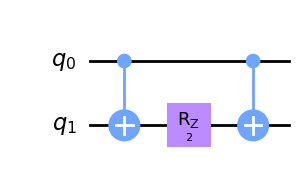

In [5]:
def zz_cc_2D(delta): 
    ''' Returns a circuit implementing ZZ(delta) for the 2D Heisenberg model '''
    zz = QuantumCircuit(2, name='ZZ')
    zz.cnot(0,1)
    zz.rz(2*delta, 1)
    zz.cnot(0,1)
    return zz

zz_cc_2D(1).draw('mpl')

(7): Due to the properties of the Pauli matrices:

$R_y(\pi/2) ~\sigma_z ~R_y(-\pi/2) = \sigma_x$,

$R_x(\pi/2)~ \sigma_z ~R_x(-\pi/2) = -\sigma_y$,

we can create the circuits realising $YY(\delta) = e^{-i \delta \sigma_y^{(1)} \sigma_y^{(2)} }$ and $XX(\delta) = e^{-i \delta \sigma_x^{(1)} \sigma_x^{(2)}}$ from the circuit implementing $ZZ(\delta)$:

(7.1): For $XX(\delta)$:

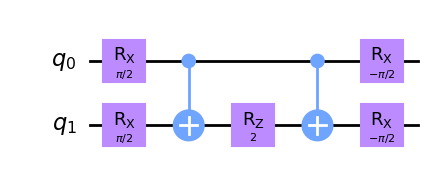

In [6]:
def yy_cc_2D(delta):
    ''' Returns a circuit implementing YY(delta) for the 2D Heisenberg model '''
    yy = QuantumCircuit(2, name='YY')
    yy.rx(np.pi/2, [0,1])
    ### ZZ ###
    yy.cnot(0,1)
    yy.rz(2*delta, 1)
    yy.cnot(0,1)
    ##########
    yy.rx(-np.pi/2, [0,1])
    return yy

yy_cc_2D(1).draw('mpl')

(7.2): For $YY(\delta)$:

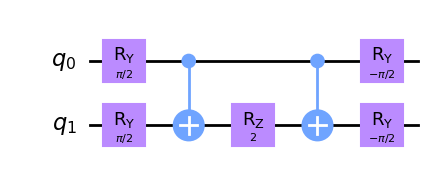

In [8]:
def xx_cc_2D(delta):
    ''' Returns a circuit implementing XX(delta) for the 2D Heisenberg model '''
    xx = QuantumCircuit(2, name='XX')
    xx.ry(np.pi/2, [0,1])
    ### ZZ ###
    xx.cnot(0,1)
    xx.rz(2*delta, 1)
    xx.cnot(0,1)   
    ##########
    xx.ry(-np.pi/2, [0,1])
    return xx

xx_cc_2D(1).draw('mpl')

(8): Thus, by justaposition we can combine the the three circuits and construct our Hamiltonean $(H_{Heis,2})$

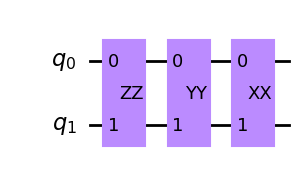

In [9]:
def Trotter_cc_2D(delta):
    ''' Create a Trotter step by appending XX, YY and ZZ circuits '''
    Trotter_cc = QuantumCircuit(2, name='Trotter')
    Trotter_cc.append(zz_cc_2D(delta), [0,1])
    Trotter_cc.append(yy_cc_2D(delta), [0,1])
    Trotter_cc.append(xx_cc_2D(delta), [0,1])
    return Trotter_cc

Trotter_cc_2D(1).draw('mpl')

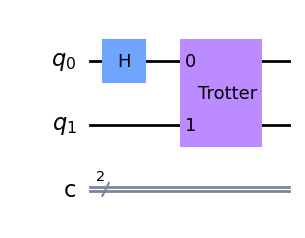

In [436]:
def initialise(circuit, state, random=False):
    ''' Initialises the circuit based on the string state '''
    i = 0
    np.random.seed(600)

    for num in state:
        if (random==True):
            on=np.random.uniform(0, np.pi)
            circuit.ry(on,i)
            
        elif (num == '1'):
            circuit.x(i)
        
        elif num == '+':
            circuit.h(i)
        elif num == '-':
            circuit.x(i)
            circuit.h(i)
        i+=1
        
def Heisenberg_2D(delta, initial_state, random=False):
    Heis_2D = QuantumCircuit(2,2) # 2 qubits + 2 classical bits for measuring
   # print(random)
    # Initial state
    initialise(Heis_2D, initial_state,random)
    # Trotter steps (only 1 is necessary for the 2D case)
    Trotter_gate = Trotter_cc_2D(delta).to_instruction()
    Heis_2D.append(Trotter_gate, [0,1])
    #Heis_2D += Trotter_cc_2D(delta)
    
    # Measure
    #for i in range(2):
    #    Heis_2D.measure(i,i)
    
    return Heis_2D

#random=Create a random initialization of the state
Heisenberg_2D(1, '+',random=False).draw('mpl')

### (9): Exact solution for $H_{Heis,2}$

In [25]:
# Hamiltonean definition
# X,Y,Z,Zero,One are operators from qiskit.opflow: https://qiskit.org/documentation/apidoc/opflow.html
def H_Heis_2D_exact():
    H = (X^X) + (Y^Y) + (Z^Z)  
    return H

#Unitary definition
def U_Heis2D_exact(t):
    H = H_Heis_2D_exact()
    U = (t * H).exp_i()
    return U

# Time step vector
time_exact = np.linspace(0, np.pi, 100)

#Assume an initial state: From Fig.5 of article - (1/np.sqrt(2)) is the renormalization
initial_state = Zero^(One + Zero)*(1/np.sqrt(2)) # |0> (|0> + |1>)

#All possible states definition with 2 qubits
state00 = Zero^Zero
state01 = Zero^One
state10 = One^Zero
state11 = One^One

state0 = One^One #Initialization for dynamic correlation functions for spins

#Probabilities from initializing in state |0> (|0> + |1>) and after hamiltonean unitary measuring in state |00>,|01>,|10>,|11>
probs_00 = np.asarray([np.abs( (~initial_state @ U_Heis2D_exact(float(t)) @ state00).eval())**2 for t in time_exact])
probs_01 = np.asarray([np.abs( (~initial_state @ U_Heis2D_exact(float(t)) @ state01).eval())**2 for t in time_exact])
probs_10 = np.asarray([np.abs( (~initial_state @ U_Heis2D_exact(float(t)) @ state10).eval())**2 for t in time_exact])
probs_11 = np.asarray([np.abs( (~initial_state @ U_Heis2D_exact(float(t)) @ state11).eval())**2 for t in time_exact])

#Spin definition <s_z> of system with hbar=1 for a 2 spin state
spins2D_exact0 = (probs_00 + probs_01 - probs_10 - probs_11)*0.5
spins2D_exact1 = (probs_00 - probs_01 + probs_10 - probs_11)*0.5

# Dynamical correlation functions (exact)
C_XX_11 = np.zeros(len(time_exact), dtype=np.complex_)
C_XX_12 = np.zeros(len(time_exact), dtype=np.complex_)

C_YY_11 = np.zeros(len(time_exact), dtype=np.complex_)
C_YY_12 = np.zeros(len(time_exact), dtype=np.complex_)

C_ZZ_11 = np.zeros(len(time_exact), dtype=np.complex_)
C_ZZ_12 = np.zeros(len(time_exact), dtype=np.complex_)

C_XY_11 = np.zeros(len(time_exact), dtype=np.complex_)
C_XY_12 = np.zeros(len(time_exact), dtype=np.complex_)


#Dynamical correlation functions according to equation (49) from article
for i in range(len(time_exact)):
    t = time_exact[i]
    
    C_XX_11[i] = 0.25*np.asarray( (~state0 @ (U_Heis2D_exact(float(t)) @ ~(X^I) @ ~U_Heis2D_exact(float(t)) @ (X^I)) @ state0).eval() )
    C_XX_12[i] = 0.25*np.asarray( (~state0 @ (U_Heis2D_exact(float(t)) @ ~(I^X) @ ~U_Heis2D_exact(float(t)) @ (X^I)) @ state0).eval() )

    C_YY_11[i] = 0.25*np.asarray( (~state0 @ (U_Heis2D_exact(float(t)) @ ~(Y^I) @ ~U_Heis2D_exact(float(t)) @ (Y^I)) @ state0).eval() )
    C_YY_12[i] = 0.25*np.asarray( (~state0 @ (U_Heis2D_exact(float(t)) @ ~(I^Y) @ ~U_Heis2D_exact(float(t)) @ (Y^I)) @ state0).eval() )

    C_ZZ_11[i] = 0.25*np.asarray( (~state0 @ (U_Heis2D_exact(float(t)) @ ~(Z^I) @ ~U_Heis2D_exact(float(t)) @ (Z^I)) @ state0).eval() )
    C_ZZ_12[i] = 0.25*np.asarray( (~state0 @ (U_Heis2D_exact(float(t)) @ ~(I^Z) @ ~U_Heis2D_exact(float(t)) @ (Z^I)) @ state0).eval() )
  
    C_XY_11[i] = 0.25*np.asarray( (~state0 @ (U_Heis2D_exact(float(t)) @ ~(Y^I) @ ~U_Heis2D_exact(float(t)) @ (X^I)) @ state0).eval() )
    C_XY_12[i] = 0.25*np.asarray( (~state0 @ (U_Heis2D_exact(float(t)) @ ~(I^Y) @ ~U_Heis2D_exact(float(t)) @ (X^I)) @ state0).eval() )

    state = U_Heis2D_exact(float(t)) @ state0
    state0 = state

# Distinguishing the real and imaginary parts
C_XX_11_real = C_XX_11.real
C_XX_11_imag = C_XX_11.imag

C_XX_12_real = C_XX_12.real
C_XX_12_imag = C_XX_12.imag

C_YY_11_real = C_YY_11.real
C_YY_11_imag = C_YY_11.imag

C_YY_12_real = C_YY_12.real
C_YY_12_imag = C_YY_12.imag

C_ZZ_11_real = C_ZZ_11.real
C_ZZ_11_imag = C_ZZ_11.imag

C_ZZ_12_real = C_ZZ_12.real
C_ZZ_12_imag = C_ZZ_12.imag

C_XY_11_real = C_XY_11.real
C_XY_11_imag = C_XY_11.imag

C_XY_12_real = C_XY_12.real
C_XY_12_imag = C_XY_12.imag



(10): Simulation parameter initialization:

In [26]:
time = np.linspace(0,np.pi,25)     # Bigger time-step
time2 = np.linspace(0,20*np.pi,100)# More well defined time-step
shots = 2**12 #4096 shots
n_qubits = 2  #2 qubit system

### Measuring the evolution of the spin components over time

(11): We first want to measure the time-evolution of the spin components:

$\hat{s}_x = \frac{1}{2} \hat{\sigma}_x$,   $\hat{s}_y = \frac{1}{2} \hat{\sigma}_y$,   $\hat{s}_z = \frac{1}{2} \hat{\sigma}_z$

For this we need to compute the expectation values: $<\hat{\sigma}_x>$, $<\hat{\sigma}_y>$ and $<\hat{\sigma}_z>$ for both components $(1)$ and $(2)$

$<\hat{\sigma}_z>$ we can compute directly from the 2D Heisenberg circuit we've constructed above since the states of the computation basis are eigenstates of $\hat{\sigma}_z$.

To measure $<\hat{\sigma}_x>$, we need to apply a Hadamard gate to our qubit before measuring it, since $H \hat{\sigma}_z H = \hat{\sigma}_x$.

To measure $<\hat{\sigma}_y>$, we neet to apply $H S^{\dagger}$, $S = \sqrt{\hat{\sigma}_z}$ to out qubit before measuring it, since $S \hat{\sigma}_x S^{\dagger} = \hat{\sigma}_y$.

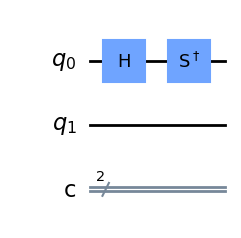

In [28]:
#Aditional circuits to obtain the expectation values of sigma-x,y,z
#Particle (1) and (2) for sigma-z
measure2D_z0 = QuantumCircuit(2,2, name='$I 1$') # don't do anything, |0>, |1> are eigenstates of Z
measure2D_z1 = QuantumCircuit(2,2, name='$I 2$') # don't do anything, |0>, |1> are eigenstates of Z

#Particle (1) for sigma-y
measure2D_y0 = QuantumCircuit(2,2, name='$HS^{\dagger}$ 1') # rotate to eigenstate basis |o+>, |o-> by applying HS^dagger 
measure2D_y0.h(0)
measure2D_y0.sdg(0)

#Particle (2) for sigma-y
measure2D_y1 = QuantumCircuit(2,2, name='$HS^{\dagger}$ 2') # rotate to eigenstate basis |o+>, |o-> by applying HS^dagger 
measure2D_y1.h(1)
measure2D_y1.sdg(1)

#Particle (1) for sigma-x
measure2D_x0 = QuantumCircuit(2,2, name='$H$ 1') # rotate to eigenstate basis |+>, |-> by applying H
measure2D_x0.h(0)

#Particle (2) for sigma-x
measure2D_x1 = QuantumCircuit(2,2, name='$H$ 2') # rotate to eigenstate basis |+>, |-> by applying H
measure2D_x1.h(1)

measure2D_y0.draw('mpl')

(12): Define the noisy backend to use it later:

In [37]:
simulator=Aer.get_backend('qasm_simulator')
    
backend_nairobi=provider.get_backend('ibm_nairobi')
noise_model=NoiseModel.from_backend(backend_nairobi)

# Get coupling map from backend
coupling_map = backend_nairobi.configuration().coupling_map
basis_gates = backend_nairobi.configuration().basis_gates
        

In [81]:
def measure_spins2D(circuit, q, delta, n_qubits, initial_state, shots, noise, random=False):
    
    results = np.zeros(len(delta))

    for t in range(len(delta)):
        qc_2D_spins = Heisenberg_2D(delta[t], initial_state,random) 
        
        spins=qc_2D_spins.compose(circuit)        ## This just provides with the Heisenberg circuit + measure spin x,y,z in particle (a)
        #spins = qc_2D_spins + circuit                 
        #qc_2D_spins.append(measure_circuit, [0,1])
        
        for j in range(n_qubits):
            spins.measure(j,j)
        
        if t==0:
            print(spins)
        
        # Run on QASM simulation with and without noise if asked
        

        #results = backend.run(spins,shots=shots).result()

        #t_spins = transpile(spins, backend=backend_manila)
        #job_spins = backend_manila.run(t_spins, shots=shots)
        #retrieved_job_spins = backend_manila.retrieve_job(job_spins.job_id())
        if noise == True:
            t_qpe2 = transpile(spins,backend=simulator,coupling_map=coupling_map,basis_gates=basis_gates,initial_layout=[0,1])#,initial_layout=[15,12]            
            job_results = simulator.run(t_qpe2,shots=shots,noise_model=noise_model).result()
            

        else:
            t_qpe2 = transpile(spins,backend=simulator)                      
            job_results = simulator.run(t_qpe2,shots=shots).result()

        # Get counts
        counts_spins = job_results.get_counts()
        
        # Calculate the probabilities for each state in the computational basis considering the frequency distribution
        probs_spins = {}
        
        for output in ['00', '01', '10', '11']:
            if output in counts_spins:
                probs_spins[output] = counts_spins[output]/shots
            else:
                probs_spins[output] = 0
             
        print('t = ', delta[t], 's', probs_spins)
        
        # To which particle (1) or (2) are we calculating the spin, it is defined by the parameter q
        if q == 0:
            results[t] = 0.5*(probs_spins['00'] + probs_spins['01'] - probs_spins['10'] - probs_spins['11'])
        elif q == 1: 
            results[t] = 0.5*(probs_spins['00'] - probs_spins['01'] + probs_spins['10'] - probs_spins['11'])
        
    return results

(13): Do the simulation for spin measurement - noisy and noiseless:

(13.1): $<\sigma_{x}^{(1)}>$


In [82]:
meas_x0 = measure_spins2D(measure2D_x0, 0, time, n_qubits, '+', shots, False , False) # <sigma_x^(1)>

False
     ┌───┐┌──────────┐┌───┐┌─┐
q_0: ┤ H ├┤0         ├┤ H ├┤M├
     └───┘│  Trotter │└┬─┬┘└╥┘
q_1: ─────┤1         ├─┤M├──╫─
          └──────────┘ └╥┘  ║ 
c: 2/═══════════════════╩═══╩═
                        1   0 
t =  0.0 s {'00': 1.0, '01': 0, '10': 0, '11': 0}
False
t =  0.1308996938995747 s {'00': 0.95068359375, '01': 0.016845703125, '10': 0.01806640625, '11': 0.014404296875}
False
t =  0.2617993877991494 s {'00': 0.810546875, '01': 0.061767578125, '10': 0.068359375, '11': 0.059326171875}
False
t =  0.39269908169872414 s {'00': 0.615234375, '01': 0.1240234375, '10': 0.13134765625, '11': 0.12939453125}
False
t =  0.5235987755982988 s {'00': 0.44921875, '01': 0.180908203125, '10': 0.186767578125, '11': 0.18310546875}
False
t =  0.6544984694978735 s {'00': 0.300048828125, '01': 0.2373046875, '10': 0.2470703125, '11': 0.215576171875}
False
t =  0.7853981633974483 s {'00': 0.246337890625, '01': 0.253662109375, '10': 0.2529296875, '11': 0.2470703125}
False
t =  0.916297857297023

In [83]:
meas_x0_noise = measure_spins2D(measure2D_x0, 0, time, n_qubits, '+', shots, True , False) # <sigma_x^(1)>

False
     ┌───┐┌──────────┐┌───┐┌─┐
q_0: ┤ H ├┤0         ├┤ H ├┤M├
     └───┘│  Trotter │└┬─┬┘└╥┘
q_1: ─────┤1         ├─┤M├──╫─
          └──────────┘ └╥┘  ║ 
c: 2/═══════════════════╩═══╩═
                        1   0 
t =  0.0 s {'00': 0.96826171875, '01': 0.019775390625, '10': 0.01171875, '11': 0.000244140625}
False
t =  0.1308996938995747 s {'00': 0.87109375, '01': 0.064208984375, '10': 0.0380859375, '11': 0.026611328125}
False
t =  0.2617993877991494 s {'00': 0.75830078125, '01': 0.10107421875, '10': 0.073486328125, '11': 0.067138671875}
False
t =  0.39269908169872414 s {'00': 0.583984375, '01': 0.149169921875, '10': 0.13232421875, '11': 0.134521484375}
False
t =  0.5235987755982988 s {'00': 0.422119140625, '01': 0.196533203125, '10': 0.193115234375, '11': 0.188232421875}
False
t =  0.6544984694978735 s {'00': 0.3193359375, '01': 0.234375, '10': 0.234619140625, '11': 0.211669921875}
False
t =  0.7853981633974483 s {'00': 0.282958984375, '01': 0.2275390625, '10': 0.238037109375,

(13.2): $<\sigma_{x}^{(2)}>$


In [84]:
meas_x1 = measure_spins2D(measure2D_x1, 1, time, n_qubits, '+', shots, False , False) # <sigma_x^(2)>

False
     ┌───┐┌──────────┐     ┌─┐   
q_0: ┤ H ├┤0         ├─────┤M├───
     └───┘│  Trotter │┌───┐└╥┘┌─┐
q_1: ─────┤1         ├┤ H ├─╫─┤M├
          └──────────┘└───┘ ║ └╥┘
c: 2/═══════════════════════╩══╩═
                            0  1 
t =  0.0 s {'00': 0.25390625, '01': 0.249267578125, '10': 0.245849609375, '11': 0.2509765625}
False
t =  0.1308996938995747 s {'00': 0.29736328125, '01': 0.2314453125, '10': 0.236083984375, '11': 0.235107421875}
False
t =  0.2617993877991494 s {'00': 0.435791015625, '01': 0.19873046875, '10': 0.186767578125, '11': 0.1787109375}
False
t =  0.39269908169872414 s {'00': 0.6318359375, '01': 0.126953125, '10': 0.112548828125, '11': 0.128662109375}
False
t =  0.5235987755982988 s {'00': 0.809814453125, '01': 0.0615234375, '10': 0.0625, '11': 0.066162109375}
False
t =  0.6544984694978735 s {'00': 0.94775390625, '01': 0.018310546875, '10': 0.0166015625, '11': 0.017333984375}
False
t =  0.7853981633974483 s {'00': 1.0, '01': 0, '10': 0, '11': 0}
False
t =

In [85]:
meas_x1_noise = measure_spins2D(measure2D_x1, 1, time, n_qubits, '+', shots, True , False) # <sigma_x^(2)>

False
     ┌───┐┌──────────┐     ┌─┐   
q_0: ┤ H ├┤0         ├─────┤M├───
     └───┘│  Trotter │┌───┐└╥┘┌─┐
q_1: ─────┤1         ├┤ H ├─╫─┤M├
          └──────────┘└───┘ ║ └╥┘
c: 2/═══════════════════════╩══╩═
                            0  1 
t =  0.0 s {'00': 0.263916015625, '01': 0.246337890625, '10': 0.25048828125, '11': 0.2392578125}
False
t =  0.1308996938995747 s {'00': 0.306396484375, '01': 0.2373046875, '10': 0.236572265625, '11': 0.2197265625}
False
t =  0.2617993877991494 s {'00': 0.430908203125, '01': 0.193359375, '10': 0.19287109375, '11': 0.182861328125}
False
t =  0.39269908169872414 s {'00': 0.60595703125, '01': 0.137939453125, '10': 0.135009765625, '11': 0.12109375}
False
t =  0.5235987755982988 s {'00': 0.750732421875, '01': 0.096435546875, '10': 0.081298828125, '11': 0.071533203125}
False
t =  0.6544984694978735 s {'00': 0.8740234375, '01': 0.055908203125, '10': 0.039794921875, '11': 0.0302734375}
False
t =  0.7853981633974483 s {'00': 0.924072265625, '01': 0.0334472

(13.3): $<\sigma_{y}^{(1)}>$


In [86]:
meas_y0 = measure_spins2D(measure2D_y0, 0, time, n_qubits, '+', shots, False , False) # <sigma_y^(1)>

False
     ┌───┐┌──────────┐┌───┐┌─────┐┌─┐
q_0: ┤ H ├┤0         ├┤ H ├┤ Sdg ├┤M├
     └───┘│  Trotter │└┬─┬┘└─────┘└╥┘
q_1: ─────┤1         ├─┤M├─────────╫─
          └──────────┘ └╥┘         ║ 
c: 2/═══════════════════╩══════════╩═
                        1          0 
t =  0.0 s {'00': 1.0, '01': 0, '10': 0, '11': 0}
False
t =  0.1308996938995747 s {'00': 0.94482421875, '01': 0.017578125, '10': 0.016845703125, '11': 0.020751953125}
False
t =  0.2617993877991494 s {'00': 0.812744140625, '01': 0.0615234375, '10': 0.06103515625, '11': 0.064697265625}
False
t =  0.39269908169872414 s {'00': 0.62646484375, '01': 0.119384765625, '10': 0.1279296875, '11': 0.126220703125}
False
t =  0.5235987755982988 s {'00': 0.42919921875, '01': 0.1962890625, '10': 0.1845703125, '11': 0.18994140625}
False
t =  0.6544984694978735 s {'00': 0.30078125, '01': 0.23974609375, '10': 0.22607421875, '11': 0.2333984375}
False
t =  0.7853981633974483 s {'00': 0.259033203125, '01': 0.24658203125, '10': 0.239501953125

In [87]:
meas_y0_noise = measure_spins2D(measure2D_y0, 0, time, n_qubits, '+', shots, True , False)

False
     ┌───┐┌──────────┐┌───┐┌─────┐┌─┐
q_0: ┤ H ├┤0         ├┤ H ├┤ Sdg ├┤M├
     └───┘│  Trotter │└┬─┬┘└─────┘└╥┘
q_1: ─────┤1         ├─┤M├─────────╫─
          └──────────┘ └╥┘         ║ 
c: 2/═══════════════════╩══════════╩═
                        1          0 
t =  0.0 s {'00': 0.968994140625, '01': 0.021240234375, '10': 0.009033203125, '11': 0.000732421875}
False
t =  0.1308996938995747 s {'00': 0.874267578125, '01': 0.06591796875, '10': 0.04052734375, '11': 0.019287109375}
False
t =  0.2617993877991494 s {'00': 0.755615234375, '01': 0.105224609375, '10': 0.076904296875, '11': 0.062255859375}
False
t =  0.39269908169872414 s {'00': 0.595947265625, '01': 0.1455078125, '10': 0.1328125, '11': 0.125732421875}
False
t =  0.5235987755982988 s {'00': 0.43359375, '01': 0.19482421875, '10': 0.19287109375, '11': 0.1787109375}
False
t =  0.6544984694978735 s {'00': 0.310302734375, '01': 0.23046875, '10': 0.23779296875, '11': 0.221435546875}
False
t =  0.7853981633974483 s {'00': 0.271

(13.4): $<\sigma_{y}^{(2)}>$

In [88]:
meas_y1 = measure_spins2D(measure2D_y1, 1, time, n_qubits, '+', shots, False , False)

False
     ┌───┐┌──────────┐     ┌─┐          
q_0: ┤ H ├┤0         ├─────┤M├──────────
     └───┘│  Trotter │┌───┐└╥┘┌─────┐┌─┐
q_1: ─────┤1         ├┤ H ├─╫─┤ Sdg ├┤M├
          └──────────┘└───┘ ║ └─────┘└╥┘
c: 2/═══════════════════════╩═════════╩═
                            0         1 
t =  0.0 s {'00': 0.24072265625, '01': 0.25146484375, '10': 0.252685546875, '11': 0.255126953125}
False
t =  0.1308996938995747 s {'00': 0.295166015625, '01': 0.232666015625, '10': 0.232666015625, '11': 0.239501953125}
False
t =  0.2617993877991494 s {'00': 0.457275390625, '01': 0.17626953125, '10': 0.1806640625, '11': 0.185791015625}
False
t =  0.39269908169872414 s {'00': 0.62451171875, '01': 0.117919921875, '10': 0.131591796875, '11': 0.1259765625}
False
t =  0.5235987755982988 s {'00': 0.8125, '01': 0.06005859375, '10': 0.06787109375, '11': 0.0595703125}
False
t =  0.6544984694978735 s {'00': 0.953857421875, '01': 0.017822265625, '10': 0.015625, '11': 0.0126953125}
False
t =  0.7853981633974483

In [89]:
meas_y1_noise = measure_spins2D(measure2D_y1, 1, time, n_qubits, '+', shots, True , False)

False
     ┌───┐┌──────────┐     ┌─┐          
q_0: ┤ H ├┤0         ├─────┤M├──────────
     └───┘│  Trotter │┌───┐└╥┘┌─────┐┌─┐
q_1: ─────┤1         ├┤ H ├─╫─┤ Sdg ├┤M├
          └──────────┘└───┘ ║ └─────┘└╥┘
c: 2/═══════════════════════╩═════════╩═
                            0         1 
t =  0.0 s {'00': 0.26025390625, '01': 0.25244140625, '10': 0.24755859375, '11': 0.23974609375}
False
t =  0.1308996938995747 s {'00': 0.31396484375, '01': 0.2373046875, '10': 0.237060546875, '11': 0.211669921875}
False
t =  0.2617993877991494 s {'00': 0.428466796875, '01': 0.199951171875, '10': 0.19873046875, '11': 0.1728515625}
False
t =  0.39269908169872414 s {'00': 0.59912109375, '01': 0.14501953125, '10': 0.14501953125, '11': 0.11083984375}
False
t =  0.5235987755982988 s {'00': 0.761474609375, '01': 0.091552734375, '10': 0.081787109375, '11': 0.065185546875}
False
t =  0.6544984694978735 s {'00': 0.880859375, '01': 0.049072265625, '10': 0.042724609375, '11': 0.02734375}
False
t =  0.785398163

(13.5): $<\sigma_{z}^{(1)}>$

In [90]:
meas_z0 = measure_spins2D(measure2D_z0, 0, time, n_qubits, '+', shots, False , False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.507568359375, '01': 0.492431640625, '10': 0, '11': 0}
False
t =  0.1308996938995747 s {'00': 0.498291015625, '01': 0.46826171875, '10': 0.033447265625, '11': 0}
False
t =  0.2617993877991494 s {'00': 0.5087890625, '01': 0.359619140625, '10': 0.131591796875, '11': 0}
False
t =  0.39269908169872414 s {'00': 0.506103515625, '01': 0.244140625, '10': 0.249755859375, '11': 0}
False
t =  0.5235987755982988 s {'00': 0.50439453125, '01': 0.12451171875, '10': 0.37109375, '11': 0}
False
t =  0.6544984694978735 s {'00': 0.503662109375, '01': 0.031494140625, '10': 0.46484375, '11': 0}
False
t =  0.7853981633974483 s {'00': 0.49658203125, '01': 0, '10': 0.50341796875, '11': 0}
False
t =  0.916297857297023 s {'00': 0.508056640625, '01': 0.0341796875, '10': 0.457763671875, '11

In [91]:
meas_z0_noise = measure_spins2D(measure2D_z0, 0, time, n_qubits, '+', shots, True , False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.51025390625, '01': 0.480712890625, '10': 0.004150390625, '11': 0.0048828125}
False
t =  0.1308996938995747 s {'00': 0.499267578125, '01': 0.444580078125, '10': 0.0400390625, '11': 0.01611328125}
False
t =  0.2617993877991494 s {'00': 0.501953125, '01': 0.35791015625, '10': 0.1259765625, '11': 0.01416015625}
False
t =  0.39269908169872414 s {'00': 0.49658203125, '01': 0.245849609375, '10': 0.239990234375, '11': 0.017578125}
False
t =  0.5235987755982988 s {'00': 0.489013671875, '01': 0.13330078125, '10': 0.3603515625, '11': 0.017333984375}
False
t =  0.6544984694978735 s {'00': 0.47216796875, '01': 0.060302734375, '10': 0.4404296875, '11': 0.027099609375}
False
t =  0.7853981633974483 s {'00': 0.47900390625, '01': 0.02734375, '10': 0.4716796875, '11': 0.02197265

(13.6): $<\sigma_{z}^{(2)}>$

In [92]:
meas_z1 = measure_spins2D(measure2D_z1, 1, time, n_qubits, '+', shots, False , False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.49462890625, '01': 0.50537109375, '10': 0, '11': 0}
False
t =  0.1308996938995747 s {'00': 0.500732421875, '01': 0.465087890625, '10': 0.0341796875, '11': 0}
False
t =  0.2617993877991494 s {'00': 0.509765625, '01': 0.36669921875, '10': 0.12353515625, '11': 0}
False
t =  0.39269908169872414 s {'00': 0.50390625, '01': 0.25634765625, '10': 0.23974609375, '11': 0}
False
t =  0.5235987755982988 s {'00': 0.503662109375, '01': 0.123291015625, '10': 0.373046875, '11': 0}
False
t =  0.6544984694978735 s {'00': 0.49365234375, '01': 0.0361328125, '10': 0.47021484375, '11': 0}
False
t =  0.7853981633974483 s {'00': 0.491943359375, '01': 0, '10': 0.508056640625, '11': 0}
False
t =  0.916297857297023 s {'00': 0.493408203125, '01': 0.0341796875, '10': 0.472412109375, '11': 0

In [93]:
meas_z1_noise = measure_spins2D(measure2D_z1, 1, time, n_qubits, '+', shots, True , False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.517822265625, '01': 0.470458984375, '10': 0.00732421875, '11': 0.00439453125}
False
t =  0.1308996938995747 s {'00': 0.505615234375, '01': 0.432373046875, '10': 0.046875, '11': 0.01513671875}
False
t =  0.2617993877991494 s {'00': 0.502685546875, '01': 0.358154296875, '10': 0.122802734375, '11': 0.016357421875}
False
t =  0.39269908169872414 s {'00': 0.506103515625, '01': 0.240234375, '10': 0.237060546875, '11': 0.0166015625}
False
t =  0.5235987755982988 s {'00': 0.485107421875, '01': 0.1328125, '10': 0.35791015625, '11': 0.024169921875}
False
t =  0.6544984694978735 s {'00': 0.482177734375, '01': 0.0576171875, '10': 0.437744140625, '11': 0.0224609375}
False
t =  0.7853981633974483 s {'00': 0.486328125, '01': 0.026123046875, '10': 0.46435546875, '11': 0.023193

(14): Plot the expectation values for spin $(1)$ and $(2)$ particles for x,y,z with and without noise, with exact values:


Text(0.5, 1.0, 'Magnetization in terms of normalized time-step $\\delta=Jt$')

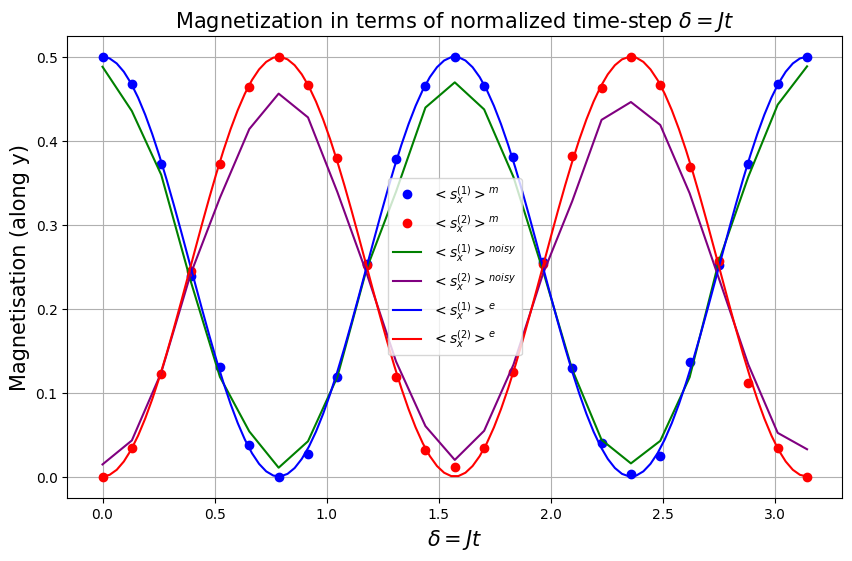

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(time, meas_x0, 'bo', label='$<s_x^{(1)}>^m$')                #Simulation
plt.plot(time, meas_x1, 'ro', label='$<s_x^{(2)}>^m$')

plt.plot(time, meas_x0_noise, 'green', label='$<s_x^{(1)}>^{noisy} $') #Noisy simulation
plt.plot(time, meas_x1_noise, 'purple', label='$<s_x^{(2)}>^{noisy}$')

plt.plot(time_exact, spins2D_exact0, 'b-', label='$<s_x^{(1)}>^e$')   #Exact from theory
plt.plot(time_exact, spins2D_exact1, 'r-', label='$<s_x^{(2)}>^e$')

plt.xlabel('$\delta = J t$',fontsize=15)
plt.ylabel('Magnetisation (along y)',fontsize=15)
plt.legend(fontsize=10)
plt.grid()
plt.title('Magnetization in terms of normalized time-step $\delta=Jt$',fontsize=15)

## Probability of being in a certain state - transition matrix definition

(15): Count pos-processing the distribution of states and see what coincides (for pure and mixed states)

In [102]:
def measure_prob_state2D(delta, shots, initial_state_qiskit, initial_state_measure, noise,random=False):
    ''' Measures the probability of being in a certain state of the computational basis '''
    
    results = np.zeros(len(delta))
    
    for t in range(len(delta)):
        qc_2D_spins = Heisenberg_2D(delta[t], initial_state_qiskit,random) 
        
        for j in range(n_qubits):
            qc_2D_spins.measure(j,j)
        
        if t==0:
            print(qc_2D_spins)
        
        # Run on QASM simulation
        if noise == True:
            t_qpe2 = transpile(qc_2D_spins,backend=simulator,coupling_map=coupling_map,basis_gates=basis_gates,initial_layout=[0,1])#,initial_layout=[15,12]            
            job_results = simulator.run(t_qpe2,shots=shots,noise_model=noise_model).result()
            

        else:
            t_qpe2 = transpile(qc_2D_spins,backend=simulator)                      
            job_results = simulator.run(t_qpe2,shots=shots).result()

        # Get counts
        counts_spins = job_results.get_counts()
        
        # Calculate the probabilities for each state in the computational basis
        probs_spins = {}
        
        
        for output in ['00', '01', '10', '11']:
            if output in counts_spins:
                probs_spins[output] = counts_spins[output]/shots
            else:
                probs_spins[output] = 0
                
        print('t = ', delta[t], 's', probs_spins)
        
        results[t] = probs_spins[initial_state_measure]
       
                
    return results

(16): Assume the same fixed initial state of: $|Init>=|0>(|0> + |1>)$, we then simulate the probability of occupation of states in the computational basis $|00>$, $|01>$, $|10>$ and $|11>$ in noiseless and noisy scenarios:

(16.1): $|+>$ to $|00>$

In [103]:
probabilities2D_plus_00 = measure_prob_state2D(time, shots, '+', '00', False, False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.498291015625, '01': 0.501708984375, '10': 0, '11': 0}
False
t =  0.1308996938995747 s {'00': 0.50146484375, '01': 0.45703125, '10': 0.04150390625, '11': 0}
False
t =  0.2617993877991494 s {'00': 0.496337890625, '01': 0.37060546875, '10': 0.133056640625, '11': 0}
False
t =  0.39269908169872414 s {'00': 0.494873046875, '01': 0.254150390625, '10': 0.2509765625, '11': 0}
False
t =  0.5235987755982988 s {'00': 0.48291015625, '01': 0.131103515625, '10': 0.385986328125, '11': 0}
False
t =  0.6544984694978735 s {'00': 0.484619140625, '01': 0.032470703125, '10': 0.48291015625, '11': 0}
False
t =  0.7853981633974483 s {'00': 0.495361328125, '01': 0, '10': 0.504638671875, '11': 0}
False
t =  0.916297857297023 s {'00': 0.491943359375, '01': 0.036376953125, '10': 0.47167968

In [104]:
probabilities2D_plus_00_noisy = measure_prob_state2D(time, shots, '+', '00', True, False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.517822265625, '01': 0.47119140625, '10': 0.004638671875, '11': 0.00634765625}
False
t =  0.1308996938995747 s {'00': 0.51611328125, '01': 0.41796875, '10': 0.049560546875, '11': 0.016357421875}
False
t =  0.2617993877991494 s {'00': 0.5068359375, '01': 0.348388671875, '10': 0.129638671875, '11': 0.01513671875}
False
t =  0.39269908169872414 s {'00': 0.502197265625, '01': 0.241455078125, '10': 0.23828125, '11': 0.01806640625}
False
t =  0.5235987755982988 s {'00': 0.478515625, '01': 0.134765625, '10': 0.365966796875, '11': 0.020751953125}
False
t =  0.6544984694978735 s {'00': 0.486328125, '01': 0.048583984375, '10': 0.444091796875, '11': 0.02099609375}
False
t =  0.7853981633974483 s {'00': 0.48828125, '01': 0.029541015625, '10': 0.45751953125, '11': 0.02465820

(16.2): $|+>$ to $|01>$

In [105]:
probabilities2D_plus_01 = measure_prob_state2D(time, shots, '+', '01', False, False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.501953125, '01': 0.498046875, '10': 0, '11': 0}
False
t =  0.1308996938995747 s {'00': 0.500732421875, '01': 0.462646484375, '10': 0.03662109375, '11': 0}
False
t =  0.2617993877991494 s {'00': 0.492431640625, '01': 0.376708984375, '10': 0.130859375, '11': 0}
False
t =  0.39269908169872414 s {'00': 0.5009765625, '01': 0.254638671875, '10': 0.244384765625, '11': 0}
False
t =  0.5235987755982988 s {'00': 0.494140625, '01': 0.116455078125, '10': 0.389404296875, '11': 0}
False
t =  0.6544984694978735 s {'00': 0.490478515625, '01': 0.03076171875, '10': 0.478759765625, '11': 0}
False
t =  0.7853981633974483 s {'00': 0.499267578125, '01': 0, '10': 0.500732421875, '11': 0}
False
t =  0.916297857297023 s {'00': 0.499267578125, '01': 0.035400390625, '10': 0.46533203125, 

In [106]:
probabilities2D_plus_01_noisy = measure_prob_state2D(time, shots, '+', '01', True, False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.50634765625, '01': 0.47998046875, '10': 0.007568359375, '11': 0.006103515625}
False
t =  0.1308996938995747 s {'00': 0.4990234375, '01': 0.4423828125, '10': 0.044677734375, '11': 0.013916015625}
False
t =  0.2617993877991494 s {'00': 0.500732421875, '01': 0.35205078125, '10': 0.132080078125, '11': 0.01513671875}
False
t =  0.39269908169872414 s {'00': 0.487548828125, '01': 0.26171875, '10': 0.235107421875, '11': 0.015625}
False
t =  0.5235987755982988 s {'00': 0.498046875, '01': 0.134521484375, '10': 0.34521484375, '11': 0.022216796875}
False
t =  0.6544984694978735 s {'00': 0.490234375, '01': 0.058349609375, '10': 0.427734375, '11': 0.023681640625}
False
t =  0.7853981633974483 s {'00': 0.4833984375, '01': 0.024169921875, '10': 0.46875, '11': 0.023681640625}
F

(16.3): $|+>$ to $|10>$

In [107]:
probabilities2D_plus_10 = measure_prob_state2D(time, shots, '+', '10', False, False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.50146484375, '01': 0.49853515625, '10': 0, '11': 0}
False
t =  0.1308996938995747 s {'00': 0.490966796875, '01': 0.475341796875, '10': 0.03369140625, '11': 0}
False
t =  0.2617993877991494 s {'00': 0.489501953125, '01': 0.388427734375, '10': 0.1220703125, '11': 0}
False
t =  0.39269908169872414 s {'00': 0.50732421875, '01': 0.24853515625, '10': 0.244140625, '11': 0}
False
t =  0.5235987755982988 s {'00': 0.4853515625, '01': 0.1328125, '10': 0.3818359375, '11': 0}
False
t =  0.6544984694978735 s {'00': 0.49267578125, '01': 0.035888671875, '10': 0.471435546875, '11': 0}
False
t =  0.7853981633974483 s {'00': 0.502685546875, '01': 0, '10': 0.497314453125, '11': 0}
False
t =  0.916297857297023 s {'00': 0.497802734375, '01': 0.036865234375, '10': 0.46533203125, '11'

In [108]:
probabilities2D_plus_10_noisy = measure_prob_state2D(time, shots, '+', '10', True, False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.5146484375, '01': 0.4765625, '10': 0.0048828125, '11': 0.00390625}
False
t =  0.1308996938995747 s {'00': 0.491455078125, '01': 0.44921875, '10': 0.040771484375, '11': 0.0185546875}
False
t =  0.2617993877991494 s {'00': 0.5126953125, '01': 0.341796875, '10': 0.13037109375, '11': 0.01513671875}
False
t =  0.39269908169872414 s {'00': 0.501220703125, '01': 0.24267578125, '10': 0.237060546875, '11': 0.01904296875}
False
t =  0.5235987755982988 s {'00': 0.4873046875, '01': 0.1279296875, '10': 0.369384765625, '11': 0.015380859375}
False
t =  0.6544984694978735 s {'00': 0.5009765625, '01': 0.04931640625, '10': 0.428955078125, '11': 0.020751953125}
False
t =  0.7853981633974483 s {'00': 0.490478515625, '01': 0.02734375, '10': 0.453857421875, '11': 0.0283203125}
False

(16.4): $|+>$ to $|11>$

In [109]:
probabilities2D_plus_11 = measure_prob_state2D(time, shots, '+', '11', False, False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.510498046875, '01': 0.489501953125, '10': 0, '11': 0}
False
t =  0.1308996938995747 s {'00': 0.5, '01': 0.4658203125, '10': 0.0341796875, '11': 0}
False
t =  0.2617993877991494 s {'00': 0.492431640625, '01': 0.381591796875, '10': 0.1259765625, '11': 0}
False
t =  0.39269908169872414 s {'00': 0.510986328125, '01': 0.24560546875, '10': 0.243408203125, '11': 0}
False
t =  0.5235987755982988 s {'00': 0.49169921875, '01': 0.133544921875, '10': 0.374755859375, '11': 0}
False
t =  0.6544984694978735 s {'00': 0.51318359375, '01': 0.034912109375, '10': 0.451904296875, '11': 0}
False
t =  0.7853981633974483 s {'00': 0.4931640625, '01': 0, '10': 0.5068359375, '11': 0}
False
t =  0.916297857297023 s {'00': 0.492431640625, '01': 0.0283203125, '10': 0.479248046875, '11': 0}


In [110]:
probabilities2D_plus_11_noisy = measure_prob_state2D(time, shots, '+', '11', True, False)

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
t =  0.0 s {'00': 0.512451171875, '01': 0.476318359375, '10': 0.00634765625, '11': 0.0048828125}
False
t =  0.1308996938995747 s {'00': 0.510009765625, '01': 0.425537109375, '10': 0.05126953125, '11': 0.01318359375}
False
t =  0.2617993877991494 s {'00': 0.492919921875, '01': 0.361328125, '10': 0.126953125, '11': 0.018798828125}
False
t =  0.39269908169872414 s {'00': 0.49267578125, '01': 0.24560546875, '10': 0.243896484375, '11': 0.017822265625}
False
t =  0.5235987755982988 s {'00': 0.48974609375, '01': 0.1279296875, '10': 0.36083984375, '11': 0.021484375}
False
t =  0.6544984694978735 s {'00': 0.502197265625, '01': 0.04931640625, '10': 0.427490234375, '11': 0.02099609375}
False
t =  0.7853981633974483 s {'00': 0.494140625, '01': 0.02294921875, '10': 0.458740234375, '11': 0.0241

Text(0.5, 1.0, 'Initial state: |+>')

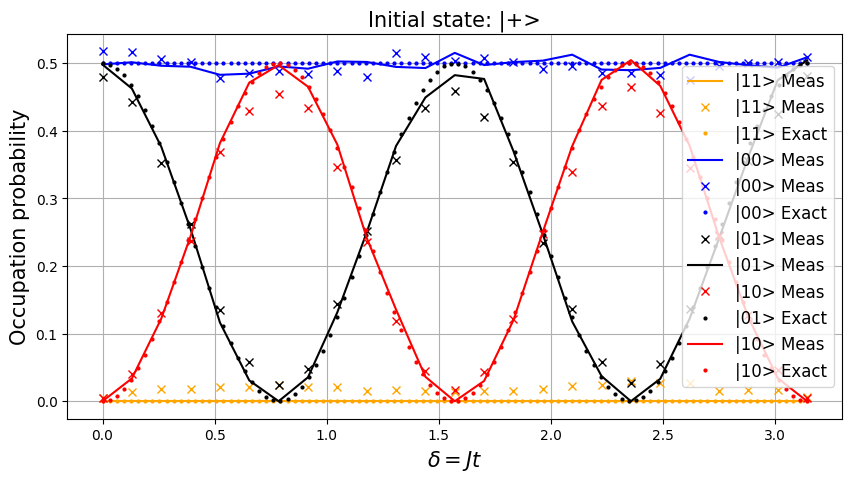

In [129]:
plt.figure(figsize=(10, 5))

plt.plot(time, probabilities2D_plus_11, 'orange', label='|11> Meas')

plt.plot(time, probabilities2D_plus_11_noisy, 'x', color="orange",markersize=6.0, label='|11> Meas')
plt.plot(time_exact, probs_11, 'o', color="orange",markersize=2.0, label='|11> Exact')

plt.plot(time, probabilities2D_plus_00, 'blue', label='|00> Meas')
plt.plot(time, probabilities2D_plus_00_noisy, 'x', color="blue",markersize=6.0, label='|00> Meas')

plt.plot(time_exact, probs_00, 'o', color="blue",markersize=2.0, label='|00> Exact')
plt.plot(time, probabilities2D_plus_01_noisy, 'x', color="black",markersize=6.0, label='|01> Meas')

plt.plot(time, probabilities2D_plus_01, 'black', label='|01> Meas')
plt.plot(time, probabilities2D_plus_10_noisy, 'x', color="red",markersize=6.0, label='|10> Meas')

plt.plot(time_exact, probs_01, 'o', color="black",markersize=2.0, label='|01> Exact')

plt.plot(time, probabilities2D_plus_10, 'red', label='|10> Meas')
plt.plot(time_exact, probs_10, 'o', color="red",markersize=2.0, label='|10> Exact')


plt.ylabel('Occupation probability',fontsize=15)
plt.xlabel('$\delta = Jt$',fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.title('Initial state: |+>',fontsize=15)

(16.5): Plot this probabilities into a 3D graph to visualize, even better perform this visualization for the distribution of states (it should look better with higher dimensions, 2D graphs wont be able to represent this)

In [198]:
def decimalToBinary(ip_val):
    a=bin(ip_val)
    b=str(a)
    
    if(ip_val<2):
        t4,t5,t6=b
        t5=0
        t4=0
        t3=0
        t1=0
        t2=0
        t0=0
        tc=0
        tb=0
        ta=0

    elif(ip_val<4):
        t3,t4,t5,t6=b
        t4=0
        t3=0
        t2=0
        t1=0
        t0=0
        tc=0
        tb=0
        ta=0

    elif(ip_val<8):
        t2,t3,t4,t5,t6=b
        t3=0
        t2=0
        t1=0
        t0=0
        tc=0
        tb=0
        ta=0

    elif(ip_val<16):
        t1,t2,t3,t4,t5,t6=b
        t2=0
        t1=0
        t0=0
        tc=0
        tb=0
        ta=0

    elif(ip_val<32):
        t0,t1,t2,t3,t4,t5,t6=b
        t1=0
        t0=0
        tc=0
        tb=0
        ta=0

    elif(ip_val<64):
        ta,t0,t1,t2,t3,t4,t5,t6=b
        t0=0
        tc=0
        tb=0
        ta=0
    elif(ip_val<128):
        tb,ta,t0,t1,t2,t3,t4,t5,t6=b
        tc=0
        tb=0
        ta=0
       

    else:
        tc,tb,ta,t0,t1,t2,t3,t4,t5,t6=b
        
    return int(t5),int(t6)

In [232]:
def State_distribution2D(delta, shots, initial_state_qiskit, noise,random):
    ''' Measures the probability of being in a certain state of the computational basis '''
    dim=4
    Final_vectorx=[]
    Final_vectorz=[]
    Delta=[]

    delta=time 
    random=False
    noise=False
    x=np.arange(dim)
    results = np.zeros(len(delta))
    initial_state_qiskit="+"
    
    for t in range(len(delta)):
        qc_2D_spins = Heisenberg_2D(delta[t], initial_state_qiskit,random) 
        
        for j in range(n_qubits):
            qc_2D_spins.measure(j,j)
        
        if t==0:
            print(qc_2D_spins)
        
        # Run on QASM simulation
        if noise == True:
            t_qpe2 = transpile(qc_2D_spins,backend=simulator,coupling_map=coupling_map,basis_gates=basis_gates,initial_layout=[0,1])#,initial_layout=[15,12]            
            job_results = simulator.run(t_qpe2,shots=shots,noise_model=noise_model).result()
            

        else:
            t_qpe2 = transpile(qc_2D_spins,backend=simulator)                      
            job_results = simulator.run(t_qpe2,shots=shots).result()
        
        # Get counts
        counts_spins = job_results.get_counts()
        prob=[0]*dim

   
        for l in range(4):
            de=decimalToBinary(l)
            ext=str(de[0])+str(de[1])
            try:
                prob[l]=counts_spins[ext]

        
            except:
                prob[l]=0
    
    
            Final_vectorx.append(x[l])            #X
            Final_vectorz.append(prob[l]/shots)   #Z
            Delta.append(delta[t])                #Y  for the 3D plot

       
                
    return Final_vectorx,Delta,Final_vectorz

In [230]:
def d3D_graph(XX,YY,ZZ):
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import cm
    # Fixing random state for reproducibility
    #np.random.seed(19680801)


    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    xpos = XX
    ypos = YY
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.1
    dz = ZZ

    cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
    max_height = np.max(dz)   # get range of colorbars so we can normalize
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k-min_height)/max_height) for k in dz] 





    ax.bar3d(xpos, ypos, zpos, dx, dy, dz ,color=rgba, zsort='average')
    plt.title("|+> Init ; Occupation states with noise")
    plt.xlabel("States")
    plt.ylabel("$\delta$=Jt")
    ax.set_zlabel("Accuracy")
    plt.savefig("2D_Distribution_states.png")

    plt.show()

False
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤0         ├┤M├───
     └───┘│  Trotter │└╥┘┌─┐
q_1: ─────┤1         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       0  1 
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes
False
yes


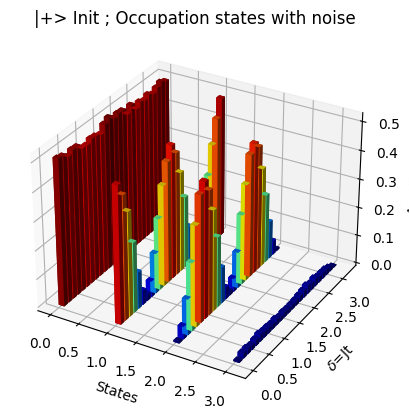

In [233]:
X,Y,Z = State_distribution2D(time, shots, '+', True, False)
d3D_graph(X,Y,Z)



(17): Dynamical correlation: According to Fig.3 and Fig.6 from paper, also eq.(49)

In [283]:
def correlation_WV_2D_circuit(delta, W, V, initial_state, sigma ,random):
    
    qc = QuantumCircuit(3,1) # 1st qubit is an ancilla
    
    # initialise
    initialise(qc, initial_state, random)
    qc.h(0)
    qc.barrier()
    
    if W == 'x1':
        qc.cx(0,2)
    elif W == 'x2':
        qc.cx(0,1)
    if W == 'y1':
        qc.cy(0,2)
    elif W == 'y2':
        qc.cy(0,1)
    if W == 'z1':
        qc.cz(0,2)
    elif W == 'z2':
        qc.cz(0,1)
    qc.barrier()
    
    qc.x(0)
    # U_Heis_2D (delta)
    Trotter_gate = Trotter_cc_2D(delta).to_instruction()
    qc.append(Trotter_gate, [1,2])
    qc.barrier()
    
    if V == 'x1':
        qc.cx(0,2)
    elif V == 'x2':
        qc.cx(0,1)
    if V == 'y1':
        qc.cy(0,2)
    elif V == 'y2':
        qc.cy(0,1)
    if V == 'z1':
        qc.cz(0,2)
    elif V == 'z2':
        qc.cz(0,1)
    qc.barrier()
    
    qc.x(0)
    qc.barrier()
    
    if sigma == 'sigmaX':
        qc.h(0)
        qc.measure(0,0)
    elif sigma == 'sigmaY':
        #qc.h(0)
        #qc.sdg(0)
        qc.rx(-np.pi/2, 0)
        qc.measure(0,0)
        
    if delta == 0:
        print(qc)
    return qc

In [284]:
correlation_WV_2D_circuit(0, 'x1', 'x1', '_11', 'sigmaX',False)

     ┌───┐ ░       ░    ┌───┐     ░       ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░───■───░────┤ X ├─────░───■───░─┤ X ├─░─┤ H ├┤M├
     ├───┤ ░   │   ░ ┌──┴───┴───┐ ░   │   ░ └───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░───┼───░─┤0         ├─░───┼───░───────░───────╫─
     ├───┤ ░ ┌─┴─┐ ░ │  Trotter │ ░ ┌─┴─┐ ░       ░       ║ 
q_2: ┤ X ├─░─┤ X ├─░─┤1         ├─░─┤ X ├─░───────░───────╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░ └───┘ ░       ░       ║ 
c: 1/═════════════════════════════════════════════════════╩═
                                                          0 


In [292]:

            
def correlation_WV_2D(time, shots, W, V, initial_state, sigma, noise, random):
    
    results = np.zeros(len(time))
    
    i = 0
    for t in time:
        qc = correlation_WV_2D_circuit(t, W, V, initial_state, sigma,random)
        
        # Run on QASM simulation
        #t_qc = transpile(qc, backend=backend_manila)
        if noise == True:
            t_qpe2 = transpile(qc,backend=simulator,coupling_map=coupling_map,basis_gates=basis_gates,initial_layout=[0,1,2])#,initial_layout=[15,12]            
            job_results = simulator.run(t_qpe2,shots=shots,noise_model=noise_model).result()
            

        else:
            t_qpe2 = transpile(qc,backend=simulator)                      
            job_results = simulator.run(t_qpe2,shots=shots).result()

        # Get counts
        counts = job_results.get_counts()

        # Calculate the probabilities for each state in the computational basis
        probs = {}

        for output in ['0', '1']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0

        print('t = ', t, 's', probs)

        results[i] = 0.25*(probs['0'] - probs['1'])
        i += 1
        
    return results
    

In [287]:
meas2D_corr_xx_11_real = correlation_WV_2D(time, shots, 'x1', 'x1', '_11', 'sigmaX', False, False)

     ┌───┐ ░       ░    ┌───┐     ░       ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░───■───░────┤ X ├─────░───■───░─┤ X ├─░─┤ H ├┤M├
     ├───┤ ░   │   ░ ┌──┴───┴───┐ ░   │   ░ └───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░───┼───░─┤0         ├─░───┼───░───────░───────╫─
     ├───┤ ░ ┌─┴─┐ ░ │  Trotter │ ░ ┌─┴─┐ ░       ░       ║ 
q_2: ┤ X ├─░─┤ X ├─░─┤1         ├─░─┤ X ├─░───────░───────╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░ └───┘ ░       ░       ║ 
c: 1/═════════════════════════════════════════════════════╩═
                                                          0 
t =  0.0 s {'0': 1.0, '1': 0}
t =  0.1308996938995747 s {'0': 0.963623046875, '1': 0.036376953125}
t =  0.2617993877991494 s {'0': 0.87451171875, '1': 0.12548828125}
t =  0.39269908169872414 s {'0': 0.7392578125, '1': 0.2607421875}
t =  0.5235987755982988 s {'0': 0.623779296875, '1': 0.376220703125}
t =  0.6544984694978735 s {'0': 0.522216796875, '1': 0.477783203125}
t =  0.7853981633974483 s {'0': 0.501953125, '1': 0.498046875}
t =  0.91629785729

In [288]:
meas2D_corr_xx_11_imag = correlation_WV_2D(time, shots, 'x1', 'x1', '_11', 'sigmaY', False ,False) #Imaginary part

     ┌───┐ ░       ░    ┌───┐     ░       ░ ┌───┐ ░ ┌──────────┐┌─┐
q_0: ┤ H ├─░───■───░────┤ X ├─────░───■───░─┤ X ├─░─┤ Rx(-π/2) ├┤M├
     ├───┤ ░   │   ░ ┌──┴───┴───┐ ░   │   ░ └───┘ ░ └──────────┘└╥┘
q_1: ┤ X ├─░───┼───░─┤0         ├─░───┼───░───────░──────────────╫─
     ├───┤ ░ ┌─┴─┐ ░ │  Trotter │ ░ ┌─┴─┐ ░       ░              ║ 
q_2: ┤ X ├─░─┤ X ├─░─┤1         ├─░─┤ X ├─░───────░──────────────╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░ └───┘ ░       ░              ║ 
c: 1/════════════════════════════════════════════════════════════╩═
                                                                 0 
t =  0.0 s {'0': 0.500244140625, '1': 0.499755859375}
t =  0.1308996938995747 s {'0': 0.3740234375, '1': 0.6259765625}
t =  0.2617993877991494 s {'0': 0.283935546875, '1': 0.716064453125}
t =  0.39269908169872414 s {'0': 0.255859375, '1': 0.744140625}
t =  0.5235987755982988 s {'0': 0.283447265625, '1': 0.716552734375}
t =  0.6544984694978735 s {'0': 0.363037109375, '1': 0.636962890625

In [289]:
meas2D_corr_xx_12_real = correlation_WV_2D(time, shots, 'x1', 'x2', '_11', 'sigmaX', False ,False) #Real part

     ┌───┐ ░       ░    ┌───┐     ░       ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░───■───░────┤ X ├─────░───■───░─┤ X ├─░─┤ H ├┤M├
     ├───┤ ░   │   ░ ┌──┴───┴───┐ ░ ┌─┴─┐ ░ └───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░───┼───░─┤0         ├─░─┤ X ├─░───────░───────╫─
     ├───┤ ░ ┌─┴─┐ ░ │  Trotter │ ░ └───┘ ░       ░       ║ 
q_2: ┤ X ├─░─┤ X ├─░─┤1         ├─░───────░───────░───────╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░       ░       ░       ║ 
c: 1/═════════════════════════════════════════════════════╩═
                                                          0 
t =  0.0 s {'0': 0.5, '1': 0.5}
t =  0.1308996938995747 s {'0': 0.52978515625, '1': 0.47021484375}
t =  0.2617993877991494 s {'0': 0.618896484375, '1': 0.381103515625}
t =  0.39269908169872414 s {'0': 0.72705078125, '1': 0.27294921875}
t =  0.5235987755982988 s {'0': 0.864013671875, '1': 0.135986328125}
t =  0.6544984694978735 s {'0': 0.965576171875, '1': 0.034423828125}
t =  0.7853981633974483 s {'0': 1.0, '1': 0}
t =  0.916297857297023 s {'0': 0

In [290]:
meas2D_corr_xx_12_imag = correlation_WV_2D(time, shots, 'x1', 'x2', '_11', 'sigmaY', False ,False) #Imaginary part


     ┌───┐ ░       ░    ┌───┐     ░       ░ ┌───┐ ░ ┌──────────┐┌─┐
q_0: ┤ H ├─░───■───░────┤ X ├─────░───■───░─┤ X ├─░─┤ Rx(-π/2) ├┤M├
     ├───┤ ░   │   ░ ┌──┴───┴───┐ ░ ┌─┴─┐ ░ └───┘ ░ └──────────┘└╥┘
q_1: ┤ X ├─░───┼───░─┤0         ├─░─┤ X ├─░───────░──────────────╫─
     ├───┤ ░ ┌─┴─┐ ░ │  Trotter │ ░ └───┘ ░       ░              ║ 
q_2: ┤ X ├─░─┤ X ├─░─┤1         ├─░───────░───────░──────────────╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░       ░       ░              ║ 
c: 1/════════════════════════════════════════════════════════════╩═
                                                                 0 
t =  0.0 s {'0': 0.51123046875, '1': 0.48876953125}
t =  0.1308996938995747 s {'0': 0.630615234375, '1': 0.369384765625}
t =  0.2617993877991494 s {'0': 0.71728515625, '1': 0.28271484375}
t =  0.39269908169872414 s {'0': 0.755126953125, '1': 0.244873046875}
t =  0.5235987755982988 s {'0': 0.719970703125, '1': 0.280029296875}
t =  0.6544984694978735 s {'0': 0.62353515625, '1': 0.3764648

In [293]:
################ Noisy ###################################

meas2D_corr_xx_11_real_noisy = correlation_WV_2D(time, shots, 'x1', 'x1', '_11', 'sigmaX', True ,False) #Real part


     ┌───┐ ░       ░    ┌───┐     ░       ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░───■───░────┤ X ├─────░───■───░─┤ X ├─░─┤ H ├┤M├
     ├───┤ ░   │   ░ ┌──┴───┴───┐ ░   │   ░ └───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░───┼───░─┤0         ├─░───┼───░───────░───────╫─
     ├───┤ ░ ┌─┴─┐ ░ │  Trotter │ ░ ┌─┴─┐ ░       ░       ║ 
q_2: ┤ X ├─░─┤ X ├─░─┤1         ├─░─┤ X ├─░───────░───────╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░ └───┘ ░       ░       ║ 
c: 1/═════════════════════════════════════════════════════╩═
                                                          0 
t =  0.0 s {'0': 0.968505859375, '1': 0.031494140625}
t =  0.1308996938995747 s {'0': 0.9111328125, '1': 0.0888671875}
t =  0.2617993877991494 s {'0': 0.837890625, '1': 0.162109375}
t =  0.39269908169872414 s {'0': 0.724853515625, '1': 0.275146484375}
t =  0.5235987755982988 s {'0': 0.6298828125, '1': 0.3701171875}
t =  0.6544984694978735 s {'0': 0.54638671875, '1': 0.45361328125}
t =  0.7853981633974483 s {'0': 0.531982421875, '1': 0.468017578125

In [294]:
meas2D_corr_xx_11_imag_noisy = correlation_WV_2D(time, shots, 'x1', 'x1', '_11', 'sigmaY', True ,False) #Imaginary part


     ┌───┐ ░       ░    ┌───┐     ░       ░ ┌───┐ ░ ┌──────────┐┌─┐
q_0: ┤ H ├─░───■───░────┤ X ├─────░───■───░─┤ X ├─░─┤ Rx(-π/2) ├┤M├
     ├───┤ ░   │   ░ ┌──┴───┴───┐ ░   │   ░ └───┘ ░ └──────────┘└╥┘
q_1: ┤ X ├─░───┼───░─┤0         ├─░───┼───░───────░──────────────╫─
     ├───┤ ░ ┌─┴─┐ ░ │  Trotter │ ░ ┌─┴─┐ ░       ░              ║ 
q_2: ┤ X ├─░─┤ X ├─░─┤1         ├─░─┤ X ├─░───────░──────────────╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░ └───┘ ░       ░              ║ 
c: 1/════════════════════════════════════════════════════════════╩═
                                                                 0 
t =  0.0 s {'0': 0.51953125, '1': 0.48046875}
t =  0.1308996938995747 s {'0': 0.39501953125, '1': 0.60498046875}
t =  0.2617993877991494 s {'0': 0.34814453125, '1': 0.65185546875}
t =  0.39269908169872414 s {'0': 0.325927734375, '1': 0.674072265625}
t =  0.5235987755982988 s {'0': 0.34716796875, '1': 0.65283203125}
t =  0.6544984694978735 s {'0': 0.418212890625, '1': 0.581787109375}
t 

In [295]:
meas2D_corr_xx_12_real_noisy = correlation_WV_2D(time, shots, 'x1', 'x2', '_11', 'sigmaX', True ,False) #Real part

     ┌───┐ ░       ░    ┌───┐     ░       ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░───■───░────┤ X ├─────░───■───░─┤ X ├─░─┤ H ├┤M├
     ├───┤ ░   │   ░ ┌──┴───┴───┐ ░ ┌─┴─┐ ░ └───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░───┼───░─┤0         ├─░─┤ X ├─░───────░───────╫─
     ├───┤ ░ ┌─┴─┐ ░ │  Trotter │ ░ └───┘ ░       ░       ║ 
q_2: ┤ X ├─░─┤ X ├─░─┤1         ├─░───────░───────░───────╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░       ░       ░       ║ 
c: 1/═════════════════════════════════════════════════════╩═
                                                          0 
t =  0.0 s {'0': 0.52783203125, '1': 0.47216796875}
t =  0.1308996938995747 s {'0': 0.55810546875, '1': 0.44189453125}
t =  0.2617993877991494 s {'0': 0.60986328125, '1': 0.39013671875}
t =  0.39269908169872414 s {'0': 0.72509765625, '1': 0.27490234375}
t =  0.5235987755982988 s {'0': 0.822021484375, '1': 0.177978515625}
t =  0.6544984694978735 s {'0': 0.88720703125, '1': 0.11279296875}
t =  0.7853981633974483 s {'0': 0.9189453125, '1': 0.08105468

In [296]:
meas2D_corr_xx_12_imag_noisy = correlation_WV_2D(time, shots, 'x1', 'x2', '_11', 'sigmaY', True ,False) #Imaginary part

     ┌───┐ ░       ░    ┌───┐     ░       ░ ┌───┐ ░ ┌──────────┐┌─┐
q_0: ┤ H ├─░───■───░────┤ X ├─────░───■───░─┤ X ├─░─┤ Rx(-π/2) ├┤M├
     ├───┤ ░   │   ░ ┌──┴───┴───┐ ░ ┌─┴─┐ ░ └───┘ ░ └──────────┘└╥┘
q_1: ┤ X ├─░───┼───░─┤0         ├─░─┤ X ├─░───────░──────────────╫─
     ├───┤ ░ ┌─┴─┐ ░ │  Trotter │ ░ └───┘ ░       ░              ║ 
q_2: ┤ X ├─░─┤ X ├─░─┤1         ├─░───────░───────░──────────────╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░       ░       ░              ║ 
c: 1/════════════════════════════════════════════════════════════╩═
                                                                 0 
t =  0.0 s {'0': 0.5146484375, '1': 0.4853515625}
t =  0.1308996938995747 s {'0': 0.62744140625, '1': 0.37255859375}
t =  0.2617993877991494 s {'0': 0.69580078125, '1': 0.30419921875}
t =  0.39269908169872414 s {'0': 0.716796875, '1': 0.283203125}
t =  0.5235987755982988 s {'0': 0.680908203125, '1': 0.319091796875}
t =  0.6544984694978735 s {'0': 0.602783203125, '1': 0.397216796875}
t 

Text(0.5, 1.0, 'Correlation function $C_{xx}^{11}$ simulation')

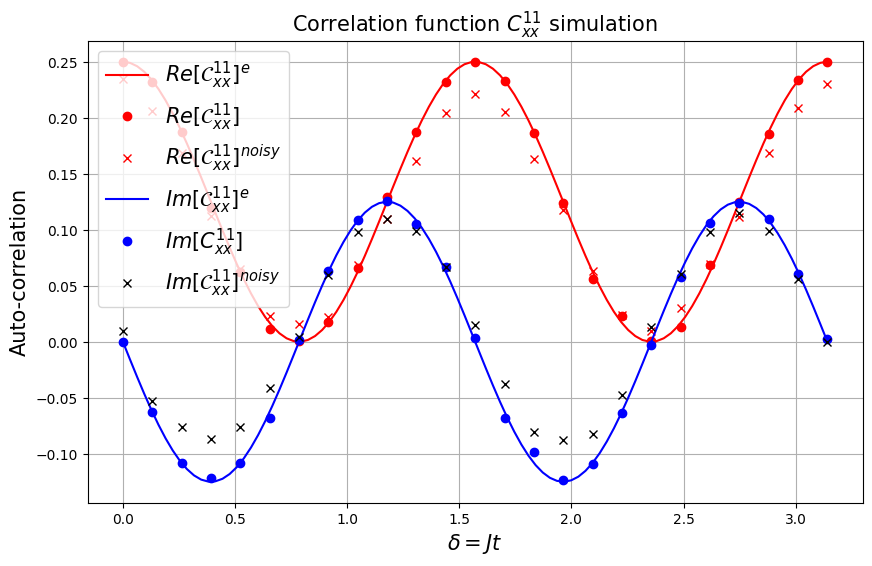

In [299]:
plt.figure(figsize=(10, 6))

plt.plot(time_exact, C_XX_11_real, 'r-',label='$Re[\mathcal{C}_{xx}^{11}]^{e}$')
plt.plot(time, meas2D_corr_xx_11_real, 'ro', label='$Re[\mathcal{C}_{xx}^{11}]$')
plt.plot(time, meas2D_corr_xx_11_real_noisy, 'x', color="red",markersize=6.0, label='$Re[\mathcal{C}_{xx}^{11}]^{noisy}$')


plt.plot(time_exact, C_XX_11_imag, 'b-',label='$Im[\mathcal{C}_{xx}^{11}]^{e}$')
plt.plot(time, meas2D_corr_xx_11_imag, 'bo',label='$Im[C_{xx}^{11}]$')
plt.plot(time, meas2D_corr_xx_11_imag_noisy,  'x', color="black",markersize=6.0, label='$Im[\mathcal{C}_{xx}^{11}]^{noisy}$')

plt.xlabel('$\delta = Jt$',fontsize=15)
plt.grid()
plt.ylabel('Auto-correlation',fontsize=15)
plt.legend(fontsize=15)
plt.title('Correlation function $C_{xx}^{11}$ simulation',fontsize=15)

## Digital simulation of the time evolution of the 3-spin Heisenberg model

The isotropic 3-spin Heisenberg model, with the spins arranged in a linear chain with 2 bonds is described by the following Hamiltonian: 

$H_{Heis,3} = J ~( \sigma_x^{(1)} \sigma_x^{(2)} + \sigma_x^{(2)} \sigma_x^{(3)} + \sigma_y^{(1)} \sigma_y^{(2)}   + \sigma_y^{(2)} \sigma_y^{(3)} + \sigma_z^{(1)} \sigma_z^{(2)} + \sigma_z^{(2)} \sigma_z^{(3)}) $.

Or, in other words, it can be written as a sum of two 2-spin isotropic Heisenberg Hamiltonians:

$H_{Heis,3} = H_{Heis,2}^{1,2} + H_{Heis,2}^{2,3}$, with


$H_{Heis,2}^{1,2} = J~ ( \sigma_x^{(1)} \sigma_x^{(2)} + \sigma_y^{(1)} \sigma_y^{(2)} + \sigma_z^{(1)} \sigma_z^{(2)} )$,

$H_{Heis,2}^{2,3} = J~ ( \sigma_x^{(2)} \sigma_x^{(3)} + \sigma_y^{(2)} \sigma_y^{(3)} + \sigma_z^{(2)} \sigma_z^{(3)} )$

The corresponding time-evolution operator will be:

$U_{Heis,3}(t) = e^{-i (H_{Heis,2}^{1,2} + H_{Heis,2}^{2,3})t } $

Since $[H_{Heis,2}^{1,2}, H_{Heis,2}^{2,3}] \neq 0$, we cannot write the exponential of the sum as a simple product of exponentials. Instead, we need to perform a Suzuki-Trotter (ST) decomposition. In this case, we need to discretise $\delta = Jt$ by $n$ steps, which need to be tuned according to the degree of precision that we seek in our results.
After this decomposition, the time-evolution operator can be approximated by:

$U_{Heis,3}(t) = \big( e^{-i H_{Heis,2}^{1,2} t/n} e^{-i H_{Heis,2}^{2,3} t/n}  \big)^n + \mathcal{O}(\delta^2/n) $,

with digital error proportional to $\delta^2 /n$ (as the number of Trotter steps increases, the approximation becomes more accurate).

Defining again $\delta = Jt$, we have:

$U_{Heis,3}(\delta) = \big( e^{ -i (\sigma_x^{(1)} \sigma_x^{(2)} + \sigma_y^{(1)} \sigma_y^{(2)} + \sigma_z^{(1)} \sigma_z^{(2)}) \delta/n } ~e^{-i (\sigma_x^{(2)} \sigma_x^{(3)} + \sigma_y^{(2)} \sigma_y^{(3)} + \sigma_z^{(2)} \sigma_z^{(3)}) \delta/n } \big)^n $

Using again the fact that $[\sigma_l^{(i)} \sigma_l^{(j)}, \sigma_{l'}^{(i)} \sigma_{l'}^{(j)}] = 0, ~\forall l,l' = x,y,z$, we can write every term in the sum of the 2-spin Hamiltonians as the product of exponentials, just like we did before when we considered the 2-spin Heisenberg model:

$U_{Heis,3}(\delta) = \big( e^{-i~\sigma_x^{(1)} \sigma_x^{(2)}~\delta/n} e^{-i~\sigma_y^{(1)} \sigma_y^{(2)}~\delta/n} e^{-i~\sigma_z^{(1)} \sigma_z^{(2)}~\delta/n} e^{-i~\sigma_x^{(2)} \sigma_x^{(3)}~\delta/n} e^{-i~\sigma_y^{(2)} \sigma_y^{(3)}~\delta/n} e^{-i~\sigma_z^{(2)} \sigma_z^{(3)}~\delta/n} \big)^n $

Now each term needs to be associated with a quantum gate in a similar way as was done for the 2-spin Heisenberg model. Since each term contains only 2 spins only 2-qubit gates are necessary.
The total quantum circuit will then be the juxtaposition of all sequences corresponding to the factors in the ST decomposition repeated n times.

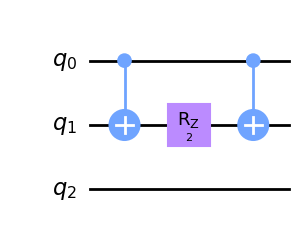

In [300]:
def zz_cc_3D(delta, qubits):
    ''' Returns a circuit implementing ZZ(delta) for the 3D Heisenberg model applied to qubits '''
    zz = QuantumCircuit(3, name='ZZ')
    zz.cnot(qubits[0],qubits[1])
    zz.rz(2*delta, qubits[1])
    zz.cnot(qubits[0],qubits[1])
    return zz

zz_cc_3D(1, [0,1]).draw('mpl') # e^(-i s_z^1 s_z^2)

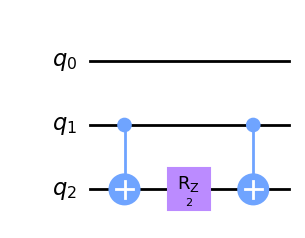

In [301]:
zz_cc_3D(1, [1,2]).draw('mpl') # e^(-i s_z^2 s_z^3)

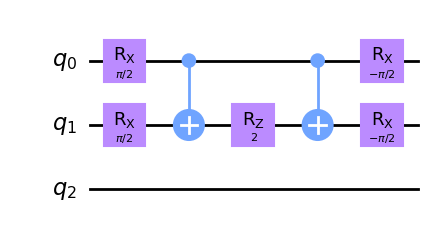

In [302]:
def yy_cc_3D(delta, qubits):
    ''' Returns a circuit implementing YY(delta) for the 3D Heisenberg model applied to qubits '''
    yy = QuantumCircuit(3, name='YY')
    yy.rx(np.pi/2, [qubits[0],qubits[1]])
    ### ZZ ###
    yy.cnot(qubits[0],qubits[1])
    yy.rz(2*delta, qubits[1])
    yy.cnot(qubits[0],qubits[1])
    ##########
    yy.rx(-np.pi/2, [qubits[0],qubits[1]])
    return yy

yy_cc_3D(1, [0,1]).draw('mpl') # e^(-i s_y^1 s_y^2)

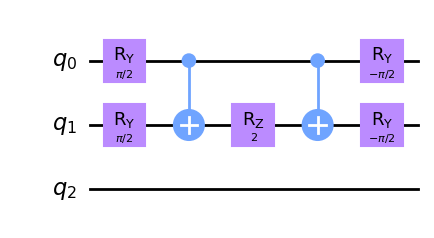

In [303]:
def xx_cc_3D(delta, qubits):
    ''' Returns a circuit implementing XX(delta) for the 3D Heisenberg model applied to qubits '''
    xx = QuantumCircuit(3, name='XX')
    xx.ry(np.pi/2, [qubits[0],qubits[1]])
    ### ZZ ###
    xx.cnot(qubits[0],qubits[1])
    xx.rz(2*delta, qubits[1])
    xx.cnot(qubits[0],qubits[1])   
    ##########
    xx.ry(-np.pi/2, [qubits[0],qubits[1]])
    return xx

xx_cc_3D(1, [0,1]).draw('mpl') # e^(-i s_x^1 s_x^2)

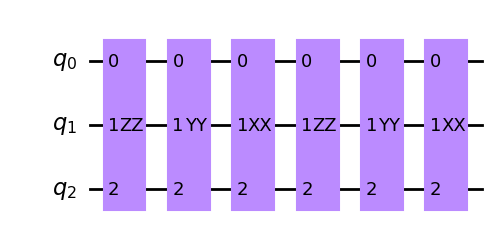

In [304]:
def Trotter_cc_3D(delta):
    ''' Create a Trotter step by appending XX, YY and ZZ circuits '''
    Trotter_cc = QuantumCircuit(3, name='Trotter')
    
    Trotter_cc.append(zz_cc_3D(delta, [0,1]), [0,1,2])
    Trotter_cc.append(yy_cc_3D(delta, [0,1]), [0,1,2])
    Trotter_cc.append(xx_cc_3D(delta, [0,1]), [0,1,2])
    
    Trotter_cc.append(zz_cc_3D(delta, [1,2]), [0,1,2])
    Trotter_cc.append(yy_cc_3D(delta, [1,2]), [0,1,2])
    Trotter_cc.append(xx_cc_3D(delta, [1,2]), [0,1,2])   
    
    return Trotter_cc

Trotter_cc_3D(1).draw('mpl')

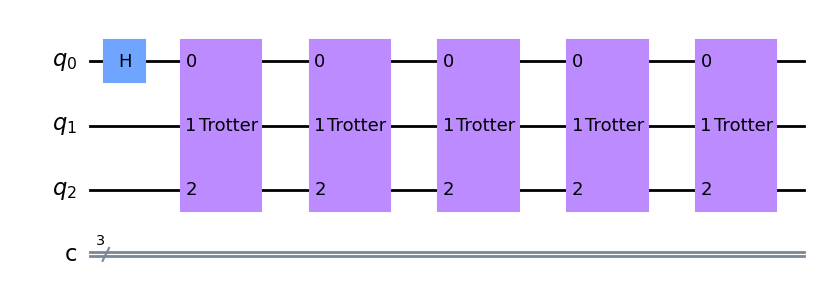

In [317]:
def Heisenberg_3D(delta, n, initial_state,random):
    Heis_3D = QuantumCircuit(3,3) # 3 qubits + 3 classical bits for measuring
    
    # Initial state
    initialise(Heis_3D, initial_state,random)
    
    # Trotter steps
    Trotter_gate = Trotter_cc_3D(delta).to_instruction()
    for i in range(n):
        Heis_3D.append(Trotter_gate, [0,1,2])
        
    # Measure
    #for i in range(3):
    #    Heis_3D.measure(i,i)
    
    return Heis_3D
    
Heisenberg_3D(2, 5, '+',False).draw('mpl') # delta=2, n=10 -> digital error ~ 0.2

In [395]:
def H_Heis_3D_exact():
    H = (I^X^X) + (X^X^I) + (I^Y^Y) + (Y^Y^I) + (I^Z^Z) + (Z^Z^I)
    return H

def U_Heis3D_exact(t):
    H = H_Heis_3D_exact()
    U = (t * H).exp_i()
    return U

time_exact = np.linspace(0, np.pi, 100)

#initial_state = Zero^Zero^(Zero + One)*(1/np.sqrt(2))
initial_state = Zero^Zero^One

state000 = Zero^Zero^Zero
state001 = Zero^Zero^One
state010 = Zero^One^Zero
state011 = Zero^One^One

state100 = One^Zero^Zero
state101 = One^Zero^One
state110 = One^One^Zero
state111 = One^One^One

probs_000 = np.asarray([np.abs( (~initial_state @ U_Heis3D_exact(float(t)) @ state000).eval())**2 for t in time_exact])
probs_001 = np.asarray([np.abs( (~initial_state @ U_Heis3D_exact(float(t)) @ state001).eval())**2 for t in time_exact])
probs_010 = np.asarray([np.abs( (~initial_state @ U_Heis3D_exact(float(t)) @ state010).eval())**2 for t in time_exact])
probs_011 = np.asarray([np.abs( (~initial_state @ U_Heis3D_exact(float(t)) @ state011).eval())**2 for t in time_exact])

probs_100 = np.asarray([np.abs( (~initial_state @ U_Heis3D_exact(float(t)) @ state100).eval())**2 for t in time_exact])
probs_101 = np.asarray([np.abs( (~initial_state @ U_Heis3D_exact(float(t)) @ state101).eval())**2 for t in time_exact])
probs_110 = np.asarray([np.abs( (~initial_state @ U_Heis3D_exact(float(t)) @ state110).eval())**2 for t in time_exact])
probs_111 = np.asarray([np.abs( (~initial_state @ U_Heis3D_exact(float(t)) @ state111).eval())**2 for t in time_exact])

spins3D_exact0 = 0.5*(probs_000 + probs_001 + probs_010 + probs_011 - probs_100 - probs_101 - probs_110 - probs_111)
spins3D_exact1 = 0.5*(probs_000 + probs_001 - probs_010 - probs_011 + probs_100 + probs_101 - probs_110 - probs_111)
spins3D_exact2 = 0.5*(probs_000 - probs_001 + probs_010 - probs_011 + probs_100 - probs_101 + probs_110 - probs_111)


In [311]:
# Dynamical correlation functions (exact)
C_XX_11_3D = np.zeros(len(time_exact), dtype=np.complex_)
C_XX_12_3D = np.zeros(len(time_exact), dtype=np.complex_)
C_XX_13_3D = np.zeros(len(time_exact), dtype=np.complex_)

C_YY_11_3D = np.zeros(len(time_exact), dtype=np.complex_)
C_YY_12_3D = np.zeros(len(time_exact), dtype=np.complex_)
C_YY_13_3D = np.zeros(len(time_exact), dtype=np.complex_)

C_ZZ_11_3D = np.zeros(len(time_exact), dtype=np.complex_)
C_ZZ_12_3D = np.zeros(len(time_exact), dtype=np.complex_)
C_ZZ_13_3D = np.zeros(len(time_exact), dtype=np.complex_)

state0_3D = One^One^One # initial state

for i in range(len(time_exact)):
    t = time_exact[i]
    
    C_XX_11_3D[i] = 0.25*np.asarray( (~state0_3D @ (U_Heis3D_exact(float(t)) @ ~(X^I^I) @ ~U_Heis3D_exact(float(t)) @ (X^I^I)) @ state0_3D).eval() )
    C_XX_12_3D[i] = 0.25*np.asarray( (~state0_3D @ (U_Heis3D_exact(float(t)) @ ~(I^X^I) @ ~U_Heis3D_exact(float(t)) @ (X^I^I)) @ state0_3D).eval() )
    C_XX_13_3D[i] = 0.25*np.asarray( (~state0_3D @ (U_Heis3D_exact(float(t)) @ ~(I^I^X) @ ~U_Heis3D_exact(float(t)) @ (X^I^I)) @ state0_3D).eval() )

    C_YY_11_3D[i] = 0.25*np.asarray( (~state0_3D @ (U_Heis3D_exact(float(t)) @ ~(Y^I^I) @ ~U_Heis3D_exact(float(t)) @ (Y^I^I)) @ state0_3D).eval() )
    C_YY_12_3D[i] = 0.25*np.asarray( (~state0_3D @ (U_Heis3D_exact(float(t)) @ ~(I^Y^I) @ ~U_Heis3D_exact(float(t)) @ (Y^I^I)) @ state0_3D).eval() )
    C_YY_13_3D[i] = 0.25*np.asarray( (~state0_3D @ (U_Heis3D_exact(float(t)) @ ~(I^I^Y) @ ~U_Heis3D_exact(float(t)) @ (Y^I^I)) @ state0_3D).eval() )

    C_ZZ_11_3D[i] = 0.25*np.asarray( (~state0_3D @ (U_Heis3D_exact(float(t)) @ ~(Z^I^I) @ ~U_Heis3D_exact(float(t)) @ (Z^I^I)) @ state0_3D).eval() )
    C_ZZ_12_3D[i] = 0.25*np.asarray( (~state0_3D @ (U_Heis3D_exact(float(t)) @ ~(I^Z^I) @ ~U_Heis3D_exact(float(t)) @ (Z^I^I)) @ state0_3D).eval() )
    C_ZZ_13_3D[i] = 0.25*np.asarray( (~state0_3D @ (U_Heis3D_exact(float(t)) @ ~(I^I^Z) @ ~U_Heis3D_exact(float(t)) @ (Z^I^I)) @ state0_3D).eval() )

    state_3D = U_Heis3D_exact(float(t)) @ state0_3D
    state0_3D = state_3D

C_XX_11_3D_real = C_XX_11_3D.real
C_XX_11_3D_imag = C_XX_11_3D.imag

C_XX_12_3D_real = C_XX_12_3D.real
C_XX_12_3D_imag = C_XX_12_3D.imag

C_XX_13_3D_real = C_XX_13_3D.real
C_XX_13_3D_imag = C_XX_13_3D.imag

C_YY_11_3D_real = C_YY_11_3D.real
C_YY_11_3D_imag = C_YY_11_3D.imag

C_YY_12_3D_real = C_YY_12_3D.real
C_YY_12_3D_imag = C_YY_12_3D.imag

C_YY_13_3D_real = C_YY_13_3D.real
C_YY_13_3D_imag = C_YY_13_3D.imag

C_ZZ_11_3D_real = C_ZZ_11_3D.real
C_ZZ_11_3D_imag = C_ZZ_11_3D.imag

C_ZZ_12_3D_real = C_ZZ_12_3D.real
C_ZZ_12_3D_imag = C_ZZ_12_3D.imag

C_ZZ_13_3D_real = C_ZZ_13_3D.real
C_ZZ_13_3D_imag = C_ZZ_13_3D.imag

In [312]:
time = np.linspace(0,np.pi,25)
time3 = np.arange(0,20)
time2 = np.arange(0,10)
shots = 2**13
n_qubits = 3

#Spin evolution

In [313]:
measure3D_x0 = QuantumCircuit(3,3, name='$H$ 1')
measure3D_x0.h(0)

measure3D_x1 = QuantumCircuit(3,3, name='$H$ 2')
measure3D_x1.h(1)

measure3D_x2 = QuantumCircuit(3,3, name='$H$ 3')
measure3D_x2.h(2)

measure3D_y0 = QuantumCircuit(3,3, name='$H S^{\dagger}$ 1')
measure3D_y0.h(0)
measure3D_y0.sdg(0)

measure3D_y1 = QuantumCircuit(3,3, name='$H S^{\dagger}$ 2')
measure3D_y1.h(1)
measure3D_y1.sdg(1)

measure3D_y2 = QuantumCircuit(3,3, name='$H S^{\dagger}$ 3')
measure3D_y2.h(2)
measure3D_y2.sdg(2)

measure3D_z0 = QuantumCircuit(3,3, name='$I$ 1')

measure3D_z1 = QuantumCircuit(3,3, name='$I$ 2')

measure3D_z2 = QuantumCircuit(3,3, name='$I$ 3')

In [323]:
def measure_spins_3D(circuit, q, delta, n_Trotter, n_qubits, shots, initial_state, noise, random):
    
    results = np.zeros(len(delta))

    for t in range(len(delta)):
        qc_3D_spins = Heisenberg_3D(delta[t]/n_Trotter, n_Trotter, initial_state,random)
    
        spins=qc_3D_spins.compose(circuit)        ## This just provides with the Heisenberg circuit + measure spin x,y,z in particle (a)

        #qc_2D_spins.append(measure_circuit, [0,1])
        
        for j in range(n_qubits):
            spins.measure(j,j)
        
        if t==0:
            print(spins)
        
        # Run on QASM simulation
        if noise == True:
            t_qpe2 = transpile(spins,backend=simulator,coupling_map=coupling_map,basis_gates=basis_gates,initial_layout=[0,1,2])#,initial_layout=[15,12]            
            job_results = simulator.run(t_qpe2,shots=shots,noise_model=noise_model).result()
            

        else:
            t_qpe2 = transpile(spins,backend=simulator)                      
            job_results = simulator.run(t_qpe2,shots=shots).result()

        # Get counts
        counts_spins = job_results.get_counts()
        
        # Calculate the probabilities for each state in the computational basis
        probs_spins = {}
        
        for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
            if output in counts_spins:
                probs_spins[output] = counts_spins[output]/shots
            else:
                probs_spins[output] = 0
             
        print('t = ', delta[t], 's', probs_spins)

        if q == 0:
            results[t] = 0.5*(probs_spins['000'] + probs_spins['001'] + probs_spins['010'] + probs_spins['011'] - probs_spins['100'] - probs_spins['101'] - probs_spins['110'] - probs_spins['111'])
        elif q == 1: 
            results[t] = 0.5*(probs_spins['000'] + probs_spins['001'] - probs_spins['010'] - probs_spins['011'] + probs_spins['100'] + probs_spins['101'] - probs_spins['110'] - probs_spins['111'])
        elif q == 2:
            results[t] = 0.5*(probs_spins['000'] - probs_spins['001'] + probs_spins['010'] - probs_spins['011'] + probs_spins['100'] - probs_spins['101'] + probs_spins['110'] - probs_spins['111'])
        
    return results

In [328]:
meas3D_z0_T5 = measure_spins_3D(measure3D_z0, 0, time, 5, 3, shots, '+', False, False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌─┐      
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤M├──────
     └───┘│          ││          ││          ││          ││          │└╥┘┌─┐   
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├─╫─┤M├───
          │          ││          ││          ││          ││          │ ║ └╥┘┌─┐
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├─╫──╫─┤M├
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘ ║  ║ └╥┘
c: 3/══════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                       0  1  2 
t =  0.0 s {'000': 0.506103515625, '001': 0.493896484375, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}
t =  0.1308996938995747 s {'000': 0.4908447265625, '001': 0.4736328125, '010': 0.0341796875, '011': 0, '100': 0.0013427734375, '101': 0, '110': 0, '111': 0}
t =  

In [329]:
meas3D_z0_T10 = measure_spins_3D(measure3D_z0, 0, time, 10, 3, shots, '+', False,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌─┐      
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤M├──────
«     │          ││          ││          ││          ││          │└╥┘┌─┐   
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├─╫─┤M├───
«     │          ││          ││          ││     

In [330]:
meas3D_z0_T50 = measure_spins_3D(measure3D_z0, 0, time, 50, 3, shots, '+', False, False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [331]:
meas3D_z0_T100 = measure_spins_3D(measure3D_z0, 0, time, 100, 3, shots, '+', False,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [336]:
meas3D_z0_T100_noisy = measure_spins_3D(measure3D_z0, 0, time, 100, 3, shots, '+', True,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [337]:
meas3D_z0_T50_noisy = measure_spins_3D(measure3D_z0, 0, time, 50, 3, shots, '+', True,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [338]:
meas3D_z0_T10_noisy = measure_spins_3D(measure3D_z0, 0, time, 10, 3, shots, '+', True,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌─┐      
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤M├──────
«     │          ││          ││          ││          ││          │└╥┘┌─┐   
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├─╫─┤M├───
«     │          ││          ││          ││     

In [339]:
meas3D_z0_T5_noisy = measure_spins_3D(measure3D_z0, 0, time, 5, 3, shots, '+', True,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌─┐      
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤M├──────
     └───┘│          ││          ││          ││          ││          │└╥┘┌─┐   
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├─╫─┤M├───
          │          ││          ││          ││          ││          │ ║ └╥┘┌─┐
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├─╫──╫─┤M├
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘ ║  ║ └╥┘
c: 3/══════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                       0  1  2 
t =  0.0 s {'000': 0.50146484375, '001': 0.47216796875, '010': 0.005126953125, '011': 0.0057373046875, '100': 0.00927734375, '101': 0.0059814453125, '110': 0.000244140625, '111': 0}
t =  0.1308996938995747 s {'000': 0.4127197265625, '001': 0.341796875, '010': 0.0860595703125, '01

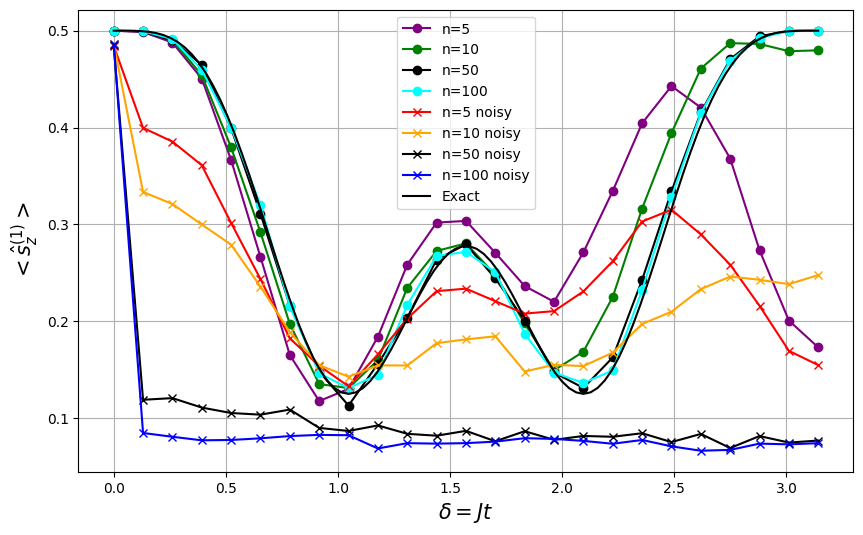

In [344]:
plt.figure(figsize=(10, 6))

plt.plot(time, meas3D_z0_T5, 'o-',color="purple",markersize=6.0, label='n=5')
plt.plot(time, meas3D_z0_T10, 'o-',color="green",markersize=6.0, label='n=10')
plt.plot(time, meas3D_z0_T50, 'o-',color="black",markersize=6.0, label='n=50')
plt.plot(time, meas3D_z0_T100, 'o-',color="cyan",markersize=6.0, label='n=100')

plt.plot(time, meas3D_z0_T5_noisy,  'x-', color="red",markersize=6.0, label='n=5 noisy')
plt.plot(time, meas3D_z0_T10_noisy,  'x-', color="orange",markersize=6.0, label='n=10 noisy')
plt.plot(time, meas3D_z0_T50_noisy,  'x-', color="black",markersize=6.0, label='n=50 noisy')
plt.plot(time, meas3D_z0_T100_noisy,  'x-', color="blue",markersize=6.0, label='n=100 noisy')

plt.plot(time_exact, spins3D_exact0, 'k-', label='Exact')
plt.xlabel('$\delta = Jt$', fontsize=15)
plt.ylabel('$<\hat{s}_z^{(1)}>$', fontsize=15)
plt.legend(fontsize=10)
plt.grid()

In [355]:
meas3D_z1_T50 = measure_spins_3D(measure3D_z1, 1, time, 50, 3, shots, '+', False,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [356]:
meas3D_z2_T50 = measure_spins_3D(measure3D_z2, 2, time, 50, 3, shots, '+', False,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [357]:
meas3D_z1_T50_noisy = measure_spins_3D(measure3D_z1, 1, time, 50, 3, shots, '+', True,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [358]:
meas3D_z2_T50_noisy = measure_spins_3D(measure3D_z2, 2, time, 50, 3, shots, '+', True,False)


     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ H ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

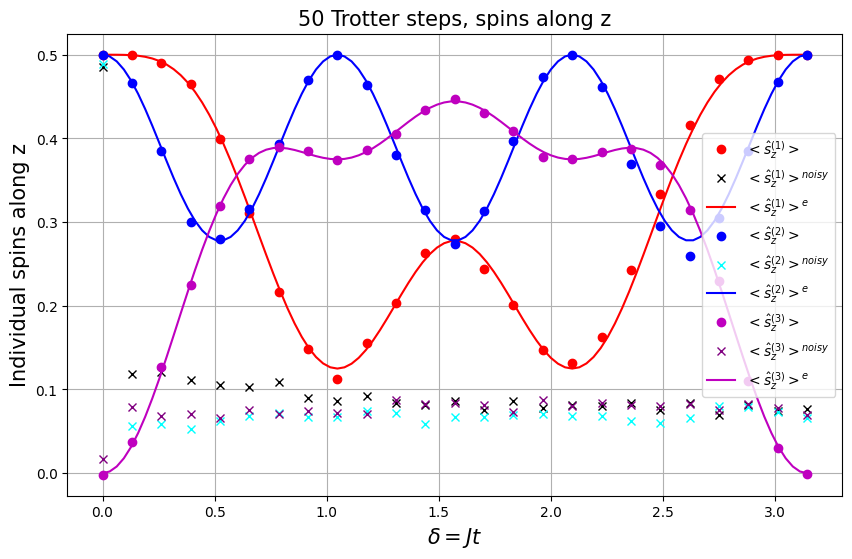

In [376]:


plt.figure(figsize=(10, 6))
plt.plot(time, meas3D_z0_T50, 'ro', label='$<\hat{s}_z^{(1)}>$')
plt.plot(time, meas3D_z0_T50_noisy, 'x', color='black', label='$<\hat{s}_z^{(1)}>^{noisy}$')
plt.plot(time_exact, spins3D_exact0, 'r-',label='$<\hat{s}_z^{(1)}>^{e}$')
plt.plot(time, meas3D_z1_T50, 'bo', label='$<\hat{s}_z^{(2)}>$')
plt.plot(time, meas3D_z1_T50_noisy,  'x', color='cyan', label='$<\hat{s}_z^{(2)}>^{noisy}$')
plt.plot(time_exact, spins3D_exact1, 'b-',label='$<\hat{s}_z^{(2)}>^{e}$')
plt.plot(time, meas3D_z2_T50, 'mo', label='$<\hat{s}_z^{(3)}>$')
plt.plot(time, meas3D_z2_T50_noisy, 'x', color='purple', label='$<\hat{s}_z^{(3)}>^{noisy}$')
plt.plot(time_exact, spins3D_exact2, 'm-',label='$<\hat{s}_z^{(3)}>^{e}$')
plt.legend(fontsize=10)
plt.grid()
plt.xlabel('$\delta = J t$', fontsize=15)
plt.ylabel('Individual spins along z', fontsize=15)
plt.title('50 Trotter steps, spins along z', fontsize=15)#
plt.savefig('50_trotter_spin2.png')
plt.show()

### Probability of being in a state

In [377]:
def probabilities_3D(delta, n_Trotter, n_qubits, shots, initial_state_qiskit, initial_state_measured, noise,random):
    ''' Probability of being in a state of the computational basis '''
    
    results = np.zeros(len(delta))

    for t in range(len(delta)):
        qc_3D_spins = Heisenberg_3D(delta[t]/n_Trotter, n_Trotter, initial_state_qiskit,random) # state is initialised in |00> (|0> + |1>)
        
        for j in range(n_qubits):
            qc_3D_spins.measure(j,j)
        
        if t==0:
            print(qc_3D_spins)
        
        if noise == True:
            t_qpe2 = transpile(qc_3D_spins,backend=simulator,coupling_map=coupling_map,basis_gates=basis_gates,initial_layout=[0,1,2])#,initial_layout=[15,12]            
            job_results = simulator.run(t_qpe2,shots=shots,noise_model=noise_model).result()
            

        else:
            t_qpe2 = transpile(qc_3D_spins,backend=simulator)                      
            job_results = simulator.run(t_qpe2,shots=shots).result()

        # Get counts
        counts_spins = job_results.get_counts()
        
        # Calculate the probabilities for each state in the computational basis
        probs_spins = {}
        
        for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
            if output in counts_spins:
                probs_spins[output] = counts_spins[output]/shots
            else:
                probs_spins[output] = 0
             
        print('t = ', delta[t], 's', probs_spins)

        results[t] = probs_spins[initial_state_measured]

    return results

##### Probability of being in state |100> over time, when initial state is |100> Fig.5b from article

In [386]:
probabilities3D_001_I001_T50 = probabilities_3D(time, 50, 3, shots, '100', '001', False, False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ X ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [389]:
probabilities3D_001_I001_T5 = probabilities_3D(time, 5, 3, shots, '100', '001', False,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌─┐      
q_0: ┤ X ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤M├──────
     └───┘│          ││          ││          ││          ││          │└╥┘┌─┐   
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├─╫─┤M├───
          │          ││          ││          ││          ││          │ ║ └╥┘┌─┐
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├─╫──╫─┤M├
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘ ║  ║ └╥┘
c: 3/══════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                       0  1  2 
t =  0.0 s {'000': 0, '001': 1.0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}
t =  0.1308996938995747 s {'000': 0, '001': 0.938232421875, '010': 0.059814453125, '011': 0, '100': 0.001953125, '101': 0, '110': 0, '111': 0}
t =  0.2617993877991494 s {'000': 0, '001':

In [390]:
probabilities3D_001_I001_T10 = probabilities_3D(time, 10, 3, shots, '100', '001', False,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ X ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌─┐      
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤M├──────
«     │          ││          ││          ││          ││          │└╥┘┌─┐   
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├─╫─┤M├───
«     │          ││          ││          ││     

In [391]:
probabilities3D_001_I001_T100 = probabilities_3D(time, 100, 3, shots, '100', '001', False,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ X ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [397]:
probabilities3D_001_I001_T100_noisy = probabilities_3D(time, 100, 3, shots, '100', '001', True,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ X ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [398]:
probabilities3D_001_I001_T50_noisy = probabilities_3D(time, 50, 3, shots, '100', '001', True,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ X ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││ 

In [399]:
probabilities3D_001_I001_T10_noisy = probabilities_3D(time, 10, 3, shots, '100', '001', True,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ X ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └───┘│          ││          ││          ││          ││          │»
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
          │          ││          ││          ││          ││          │»
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌─┐      
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤M├──────
«     │          ││          ││          ││          ││          │└╥┘┌─┐   
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├─╫─┤M├───
«     │          ││          ││          ││     

In [400]:
probabilities3D_001_I001_T5_noisy = probabilities_3D(time, 5, 3, shots, '100', '001', True,False)

     ┌───┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌─┐      
q_0: ┤ X ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤M├──────
     └───┘│          ││          ││          ││          ││          │└╥┘┌─┐   
q_1: ─────┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├─╫─┤M├───
          │          ││          ││          ││          ││          │ ║ └╥┘┌─┐
q_2: ─────┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├─╫──╫─┤M├
          └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘ ║  ║ └╥┘
c: 3/══════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                       0  1  2 
t =  0.0 s {'000': 0.0562744140625, '001': 0.9169921875, '010': 0.000732421875, '011': 0.0098876953125, '100': 0.00048828125, '101': 0.0152587890625, '110': 0.0001220703125, '111': 0.000244140625}
t =  0.1308996938995747 s {'000': 0.1422119140625, '001': 0.5823974609375, '010': 0

Text(0.5, 1.0, 'Initial state is |001>')

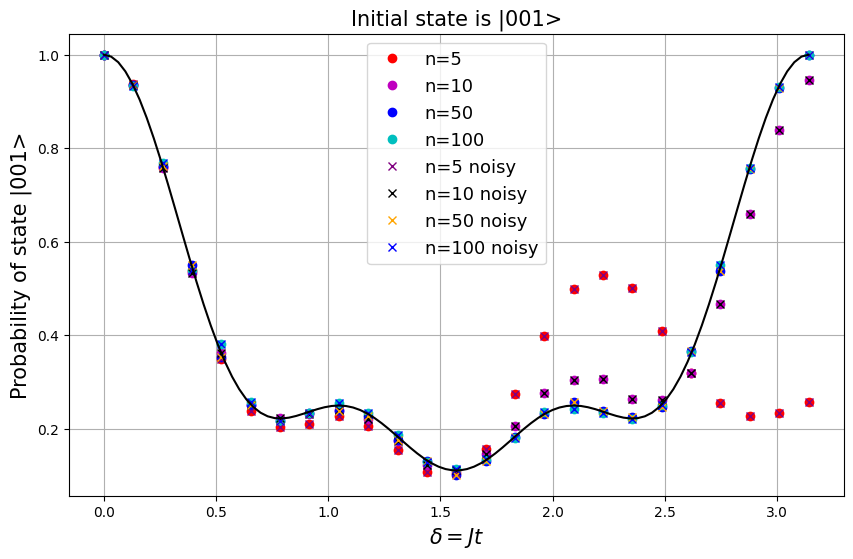

In [402]:
plt.figure(figsize=(10, 6))
plt.plot(time, probabilities3D_001_I001_T5, 'ro', label='n=5')
plt.plot(time, probabilities3D_001_I001_T10, 'mo', label='n=10')
plt.plot(time, probabilities3D_001_I001_T50, 'bo', label='n=50')
plt.plot(time, probabilities3D_001_I001_T100, 'co', label='n=100')

plt.plot(time, probabilities3D_001_I001_T5, 'x', color='purple', label='n=5 noisy')
plt.plot(time, probabilities3D_001_I001_T10, 'x', color='black', label='n=10 noisy')
plt.plot(time, probabilities3D_001_I001_T50, 'x', color='orange', label='n=50 noisy')
plt.plot(time, probabilities3D_001_I001_T100, 'x', color='blue', label='n=100 noisy')
plt.grid()
plt.plot(time_exact, probs_001, 'k-')
plt.legend(fontsize=13)
plt.xlabel('$\delta = J t$',fontsize=15)
plt.ylabel('Probability of state |001>', fontsize=15)
plt.title('Initial state is |001>', fontsize=15)

In [403]:
def decimalToBinary3D(ip_val):
    a=bin(ip_val)
    b=str(a)
    
    if(ip_val<2):
        t4,t5,t6=b
        t5=0
        t4=0
        t3=0
        t1=0
        t2=0
        t0=0
        tc=0
        tb=0
        ta=0

    elif(ip_val<4):
        t3,t4,t5,t6=b
        t4=0
        t3=0
        t2=0
        t1=0
        t0=0
        tc=0
        tb=0
        ta=0

    elif(ip_val<8):
        t2,t3,t4,t5,t6=b
        t3=0
        t2=0
        t1=0
        t0=0
        tc=0
        tb=0
        ta=0

    elif(ip_val<16):
        t1,t2,t3,t4,t5,t6=b
        t2=0
        t1=0
        t0=0
        tc=0
        tb=0
        ta=0

    elif(ip_val<32):
        t0,t1,t2,t3,t4,t5,t6=b
        t1=0
        t0=0
        tc=0
        tb=0
        ta=0

    elif(ip_val<64):
        ta,t0,t1,t2,t3,t4,t5,t6=b
        t0=0
        tc=0
        tb=0
        ta=0
    elif(ip_val<128):
        tb,ta,t0,t1,t2,t3,t4,t5,t6=b
        tc=0
        tb=0
        ta=0
       

    else:
        tc,tb,ta,t0,t1,t2,t3,t4,t5,t6=b
        
    return int(t4),int(t5),int(t6)

In [417]:
def State_distribution3D(delta, n_Trotter, n_qubits, shots, initial_state_qiskit, noise,random):
    ''' Measures the probability of being in a certain state of the computational basis '''
    dim=8
    Final_vectorx=[]
    Final_vectorz=[]
    Delta=[]
    
    x=np.arange(dim)
    results = np.zeros(len(delta))
    
    for t in range(len(delta)):
        qc_3D_spins = Heisenberg_3D(delta[t]/n_Trotter, n_Trotter, initial_state_qiskit,random) # state is initialised in |00> (|0> + |1>)
        
        for j in range(n_qubits):
            qc_3D_spins.measure(j,j)
        
        if t==0:
            print(qc_3D_spins)
        
        # Run on QASM smulation
        if noise == True:
            t_qpe2 = transpile(qc_3D_spins,backend=simulator,coupling_map=coupling_map,basis_gates=basis_gates,initial_layout=[0,1,2])#,initial_layout=[15,12]            
            job_results = simulator.run(t_qpe2,shots=shots,noise_model=noise_model).result()
            

        else:
            t_qpe2 = transpile(qc_3D_spins,backend=simulator)                      
            job_results = simulator.run(t_qpe2,shots=shots).result()
        
        # Get counts
        counts_spins = job_results.get_counts()
        prob=[0]*dim

   
        for l in range(dim):
            de=decimalToBinary3D(l)
            ext=str(de[0])+str(de[1])+str(de[2])
            try:
                prob[l]=counts_spins[ext]

        
            except:
                prob[l]=0
    
    
            Final_vectorx.append(x[l])            #X
            Final_vectorz.append(prob[l]/shots)   #Z
            Delta.append(delta[t])                #Y  for the 3D plot

    print(Final_vectorx)
                
    return Final_vectorx,Delta,Final_vectorz

In [437]:
X2,Y2,Z2 = State_distribution3D(time, 50, 3, shots, '001', False,True)

     ┌─────────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q_0: ┤ Ry(0.10168) ├┤0         ├┤0         ├┤0         ├┤0         ├»
     └┬───────────┬┘│          ││          ││          ││          │»
q_1: ─┤ Ry(1.704) ├─┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
      ├───────────┴┐│          ││          ││          ││          │»
q_2: ─┤ Ry(2.5224) ├┤2         ├┤2         ├┤2         ├┤2         ├»
      └────────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 3/═══════════════════════════════════════════════════════════════»
                                                                    »
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q_0: ┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├┤0         ├»
«     │          ││          ││          ││          ││          ││          │»
«q_1: ┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
«     │          ││          ││          ││       

In [438]:
def d3D_graphD(XX,YY,ZZ):
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import cm
    # Fixing random state for reproducibility
    #np.random.seed(19680801)


    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    xpos = XX
    ypos = YY
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.1
    dz = ZZ

    cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
    max_height = np.max(dz)   # get range of colorbars so we can normalize
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k-min_height)/max_height) for k in dz] 





    ax.bar3d(xpos, ypos, zpos, dx, dy, dz ,color=rgba, zsort='average')
    plt.title("seed: 600 Init ; n = 50 ; Occupation states")
    plt.xlabel("States")
    plt.ylabel("$\delta$=Jt")
    ax.set_zlabel("Accuracy")
    plt.savefig("3D_Distribution_states3.png")

    plt.show()

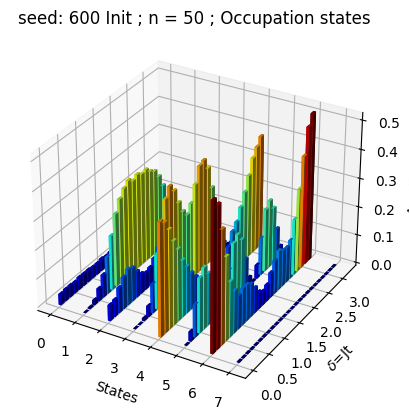

In [439]:
d3D_graphD(X2,Y2,Z2)

### Correlation functions

In [440]:
def correlation_WV_3D_circuit(delta, n, W, V, initial_state, sigma,random):
    
    qc = QuantumCircuit(4,1) # 1st qubit is an ancilla
    
    # initialise
    initialise(qc, initial_state,random)
    qc.h(0)
    qc.barrier()
    
    if W == 'x1':
        qc.cx(0,3)
    elif W == 'x2':
        qc.cx(0,2)
    elif W == 'x3':
        qc.cx(0,1)
    if W == 'y1':
        qc.cy(0,3)
    elif W == 'y2':
        qc.cy(0,2)
    elif W == 'y3':
        qc.cy(0,1)
    if W == 'z1':
        qc.cz(0,3)
    elif W == 'z2':
        qc.cz(0,2)
    elif W == 'z3':
        qc.cz(0,1)
    qc.barrier()
    
    qc.x(0)
    # U_Heis_3D (delta)
    Trotter_gate = Trotter_cc_3D(delta/n).to_instruction()
    for i in range(n):
        qc.append(Trotter_gate, [1,2,3])
    qc.barrier()
    
    if V == 'x1':
        qc.cx(0,3)
    elif V == 'x2':
        qc.cx(0,2)
    elif V == 'x3':
        qc.cx(0,1)
    if V == 'y1':
        qc.cy(0,3)
    elif V == 'y2':
        qc.cy(0,2)
    elif V == 'y3':
        qc.cy(0,1)
    if V == 'z1':
        qc.cz(0,3)
    elif V == 'z2':
        qc.cz(0,2)
    elif V == 'z3':
        qc.cz(0,1)
    qc.barrier()
    
    qc.x(0)
    qc.barrier()
    
    if sigma == 'sigmaX':
        qc.h(0)
        qc.measure(0,0)
    elif sigma == 'sigmaY':
        #qc.h(0)
        #qc.sdg(0)
        qc.rx(-np.pi/2, 0)
        qc.measure(0,0)
        
    if delta == 0:
        print(qc)
    return qc

In [443]:
def correlation_WV_3D(time, n, shots, W, V, initial_state, sigma, noise,random):
    
    results = np.zeros(len(time))
    
    i = 0
    for t in time:
        qc = correlation_WV_3D_circuit(t, n, W, V, initial_state, sigma,random)
        
        # Run on QASM simulation
        if noise == True:
            t_qpe2 = transpile(qc,backend=simulator,coupling_map=coupling_map,basis_gates=basis_gates,initial_layout=[0,1,2,3])#,initial_layout=[15,12]            
            job_results = simulator.run(t_qpe2,shots=shots,noise_model=noise_model).result()
            

        else:
            t_qpe2 = transpile(qc,backend=simulator)                      
            job_results = simulator.run(t_qpe2,shots=shots).result()

        # Get counts
        counts = job_results.get_counts()

        # Calculate the probabilities for each state in the computational basis
        probs = {}

        for output in ['0', '1']:
            if output in counts:
                probs[output] = counts[output]/shots
            else:
                probs[output] = 0

        print('t = ', t, 's', probs)

        results[i] = 0.25*(probs['0'] - probs['1'])
        i += 1
        
    return results

In [444]:
meas3D_C_XX_11_real = correlation_WV_3D(time, 10, shots, 'x1', 'x1', '_111', 'sigmaX', False,False) # n_Trotter = 50
meas3D_C_XX_12_real = correlation_WV_3D(time, 10, shots, 'x1', 'x2', '_111', 'sigmaX', False,False) # n_Trotter = 50
meas3D_C_XX_13_real = correlation_WV_3D(time, 10, shots, 'x1', 'x3', '_111', 'sigmaX', False,False) # n_Trotter = 50

meas3D_C_XX_11_real_noisy = correlation_WV_3D(time, 10, shots, 'x1', 'x1', '_111', 'sigmaX', True,False) # n_Trotter = 50
meas3D_C_XX_12_real_noisy = correlation_WV_3D(time, 10, shots, 'x1', 'x2', '_111', 'sigmaX', True,False) # n_Trotter = 50
meas3D_C_XX_13_real_noisy = correlation_WV_3D(time, 10, shots, 'x1', 'x3', '_111', 'sigmaX', True,False) # n_Trotter = 50

meas3D_C_XX_11_imag = correlation_WV_3D(time, 10, shots, 'x1', 'x1', '_111', 'sigmaY', False,False) # n_Trotter = 50
meas3D_C_XX_12_imag = correlation_WV_3D(time, 10, shots, 'x1', 'x2', '_111', 'sigmaY', False,False) # n_Trotter = 50
meas3D_C_XX_13_imag = correlation_WV_3D(time, 10, shots, 'x1', 'x3', '_111', 'sigmaY', False,False) # n_Trotter = 50

meas3D_C_XX_11_imag_noisy = correlation_WV_3D(time, 10, shots, 'x1', 'x1', '_111', 'sigmaY', True,False) # n_Trotter = 50
meas3D_C_XX_12_imag_noisy = correlation_WV_3D(time, 10, shots, 'x1', 'x2', '_111', 'sigmaY', True,False) # n_Trotter = 50
meas3D_C_XX_13_imag_noisy = correlation_WV_3D(time, 10, shots, 'x1', 'x3', '_111', 'sigmaY', True,False) # n_Trotter = 50

     ┌───┐ ░       ░    ┌───┐                                        »
q_0: ┤ H ├─░───■───░────┤ X ├────────────────────────────────────────»
     ├───┤ ░   │   ░ ┌──┴───┴───┐┌──────────┐┌──────────┐┌──────────┐»
q_1: ┤ X ├─░───┼───░─┤0         ├┤0         ├┤0         ├┤0         ├»
     ├───┤ ░   │   ░ │          ││          ││          ││          │»
q_2: ┤ X ├─░───┼───░─┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├┤1 Trotter ├»
     ├───┤ ░ ┌─┴─┐ ░ │          ││          ││          ││          │»
q_3: ┤ X ├─░─┤ X ├─░─┤2         ├┤2         ├┤2         ├┤2         ├»
     └───┘ ░ └───┘ ░ └──────────┘└──────────┘└──────────┘└──────────┘»
c: 1/════════════════════════════════════════════════════════════════»
                                                                     »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌────

Text(0.5, 1.0, '10 Trotter steps, Autocorrelation')

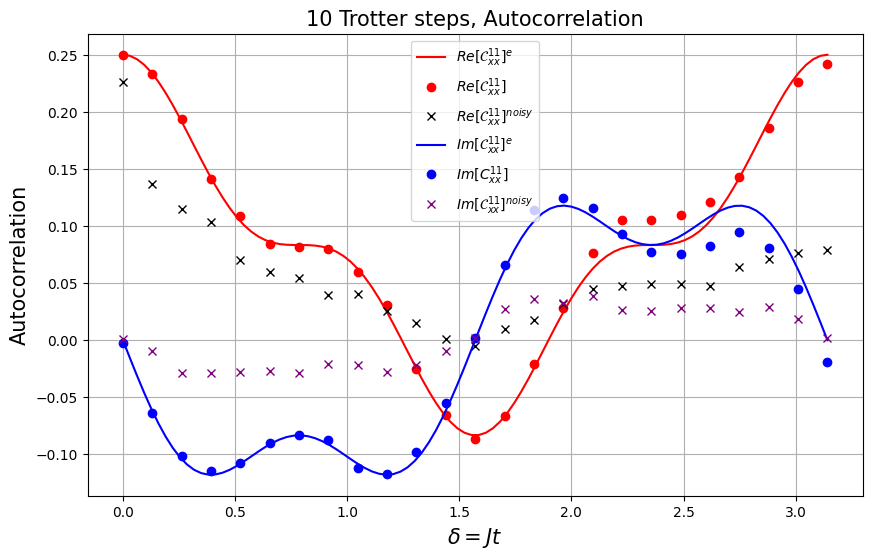

In [452]:
plt.figure(figsize=(10, 6))

plt.plot(time_exact, C_XX_11_3D_real, 'r-',label='$Re[\mathcal{C}_{xx}^{11}]^{e}$')
plt.plot(time, meas3D_C_XX_11_real, 'ro', label='$Re[\mathcal{C}_{xx}^{11}]$')
plt.plot(time, meas3D_C_XX_11_real_noisy, 'x', color="black", label='$Re[\mathcal{C}_{xx}^{11}]^{noisy}$')


plt.plot(time_exact, C_XX_11_3D_imag, 'b-',label='$Im[\mathcal{C}_{xx}^{11}]^{e}$')
plt.plot(time, meas3D_C_XX_11_imag, 'bo',label='$Im[C_{xx}^{11}]$')
plt.plot(time, meas3D_C_XX_11_imag_noisy, 'x', color="purple", label='$Im[\mathcal{C}_{xx}^{11}]^{noisy}$')

plt.xlabel('$\delta = Jt$', fontsize=15)
plt.ylabel('Autocorrelation', fontsize=15)
plt.grid()
plt.legend(fontsize=10)
plt.savefig("Autocorr.png")
plt.title('10 Trotter steps, Autocorrelation', fontsize=15)

Text(0.5, 1.0, '10 Trotter steps, Nearest-neighbour cross-correlation')

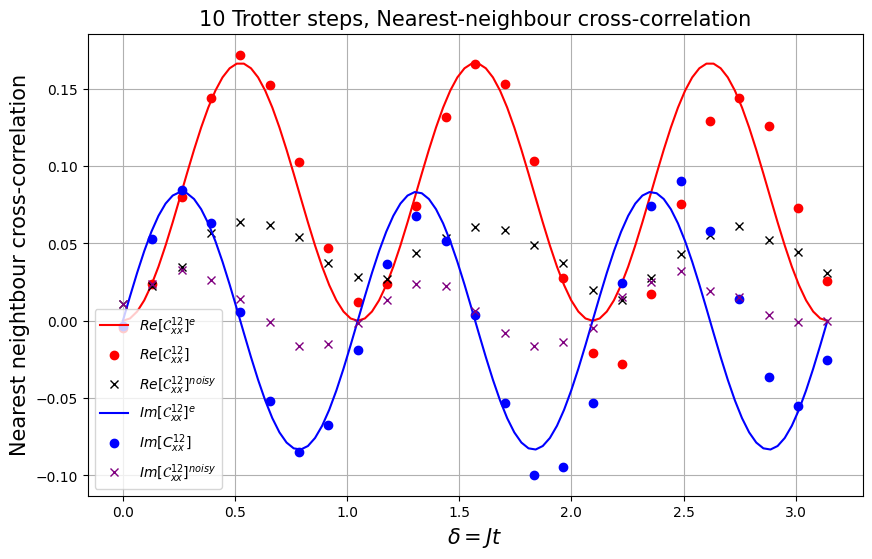

In [453]:
plt.figure(figsize=(10, 6))

plt.plot(time_exact, C_XX_12_3D_real, 'r-',label='$Re[\mathcal{C}_{xx}^{12}]^{e}$')
plt.plot(time, meas3D_C_XX_12_real, 'ro', label='$Re[\mathcal{C}_{xx}^{12}]$')
plt.plot(time, meas3D_C_XX_12_real_noisy, 'x', color="black", label='$Re[\mathcal{C}_{xx}^{12}]^{noisy}$')


plt.plot(time_exact, C_XX_12_3D_imag, 'b-',label='$Im[\mathcal{C}_{xx}^{12}]^{e}$')
plt.plot(time, meas3D_C_XX_12_imag, 'bo',label='$Im[C_{xx}^{12}]$')
plt.plot(time, meas3D_C_XX_12_imag_noisy, 'x', color="purple", label='$Im[\mathcal{C}_{xx}^{12}]^{noisy}$')

plt.xlabel('$\delta = Jt$', fontsize=15)
plt.ylabel('Nearest neightbour cross-correlation', fontsize=15)
plt.grid()
plt.legend(fontsize=10)
plt.savefig("Nearest_n.png")
plt.title('10 Trotter steps, Nearest-neighbour cross-correlation', fontsize=15)

Text(0.5, 1.0, '10 Trotter steps, Next-to-nearest-neighbour cross-correlation')

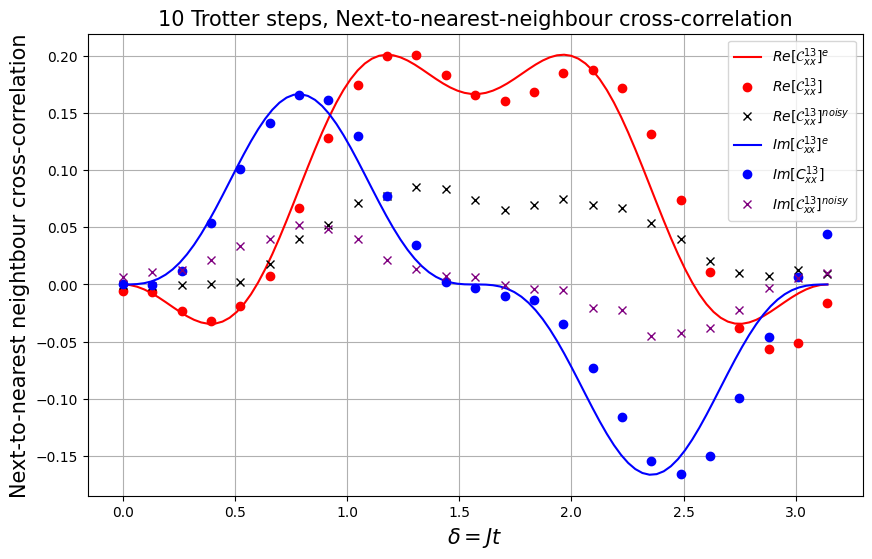

In [454]:
plt.figure(figsize=(10, 6))

plt.plot(time_exact, C_XX_13_3D_real, 'r-',label='$Re[\mathcal{C}_{xx}^{13}]^{e}$')
plt.plot(time, meas3D_C_XX_13_real, 'ro', label='$Re[\mathcal{C}_{xx}^{13}]$')
plt.plot(time, meas3D_C_XX_13_real_noisy, 'x', color="black", label='$Re[\mathcal{C}_{xx}^{13}]^{noisy}$')


plt.plot(time_exact, C_XX_13_3D_imag, 'b-',label='$Im[\mathcal{C}_{xx}^{13}]^{e}$')
plt.plot(time, meas3D_C_XX_13_imag, 'bo',label='$Im[C_{xx}^{13}]$')
plt.plot(time, meas3D_C_XX_13_imag_noisy, 'x', color="purple", label='$Im[\mathcal{C}_{xx}^{13}]^{noisy}$')

plt.xlabel('$\delta = Jt$', fontsize=15)
plt.ylabel('Next-to-nearest neightbour cross-correlation', fontsize=15)
plt.grid()
plt.legend(fontsize=10)
plt.savefig("Nearest_n.png")
plt.title('10 Trotter steps, Next-to-nearest-neighbour cross-correlation', fontsize=15)